In [ ]:
#Regular EDA(Exploratory Data Analysis) & Plotting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import tensorflow as tf

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.preprocessing import LabelEncoder

%matplotlib inline

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Pranavtheking007/Nidan-2.0/main/megaGymDataset.csv')
df

,Unnamed: 0,Title,Desc,Type,BodyPart,Equipment,Level,Rating,RatingDesc
0,0,Partner plank band row,The partner plank band row is an abdominal exe...,Strength,Abdominals,Bands,Intermediate,0.0,NaN
1,1,Banded crunch isometric hold,The banded crunch isometric hold is an exercis...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
2,2,FYR Banded Plank Jack,The banded plank jack is a variation on the pl...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
3,3,Banded crunch,The banded crunch is an exercise targeting the...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
4,4,Crunch,The crunch is a popular core exercise targetin...,Strength,Abdominals,Bands,Intermediate,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2913,2913,EZ-bar skullcrusher-,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1,Average
2914,2914,Lying Close-Grip Barbell Triceps Press To Chin,NaN,Strength,Triceps,E-Z Curl Bar,Beginner,8.1,Average
2915,2915,EZ-Bar Skullcrusher - Gethin Variation,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN
2916,2916,TBS Skullcrusher,The EZ-bar skullcrusher is a popular exercise ...,Strength,Triceps,E-Z Curl Bar,Intermediate,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2918 entries, 0 to 2917
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2918 non-null   int64  
 1   Title       2918 non-null   object 
 2   Desc        1368 non-null   object 
 3   Type        2918 non-null   object 
 4   BodyPart    2918 non-null   object 
 5   Equipment   2918 non-null   object 
 6   Level       2918 non-null   object 
 7   Rating      1031 non-null   float64
 8   RatingDesc  862 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 205.3+ KB


In [ ]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('RatingDesc',axis=1,inplace=True)

In [ ]:
len(df['Title'].value_counts())

2909

In [ ]:
df['Equipment'].value_counts()

Body Only        1078
Dumbbell          516
Barbell           282
Other             254
Cable             226
Machine           175
Kettlebells       149
Bands             100
Medicine Ball      38
Exercise Ball      35
None               32
E-Z Curl Bar       22
Foam Roll          11
Name: Equipment, dtype: int64

In [ ]:
len(df['Desc'].value_counts())

1050

In [ ]:
df['Type'].value_counts()

Strength                 2545
Stretching                147
Plyometrics                97
Powerlifting               37
Cardio                     35
Olympic Weightlifting      35
Strongman                  22
Name: Type, dtype: int64

In [ ]:
df['Level'].value_counts()

Intermediate    2446
Beginner         459
Expert            13
Name: Level, dtype: int64

In [ ]:
df.isna().sum()

Title           0
Desc         1550
Type            0
BodyPart        0
Equipment       0
Level           0
Rating       1887
dtype: int64

In [ ]:
df['Rating'].fillna(df['Rating'].median(),inplace=True)

In [ ]:
df.isna().sum()

Title           0
Desc         1550
Type            0
BodyPart        0
Equipment       0
Level           0
Rating          0
dtype: int64

In [ ]:
df.drop('Desc',axis=1,inplace=True)

In [ ]:
Intermediate = []
for i in range (0,len(df['Level'])):
  if df.iloc[i]['Level'] == 'Intermediate':
    Intermediate.append(i)

In [ ]:
Beginer = []
for i in range (0,len(df['Level'])):
  if df.iloc[i]['Level'] == 'Beginner':
    Beginer.append(i)

In [ ]:
Expert = []
for i in range (0,len(df['Level'])):
  if df.iloc[i]['Level'] == 'Expert':
    Expert.append(i)

In [ ]:
Intermediate_df = df.drop(Beginer+Expert)

In [ ]:
Beginner_df = df.drop(Intermediate+Expert)

In [ ]:
Expert_df = df.drop(Intermediate+Beginer)

In [ ]:
len(df['Type'].value_counts()),len(Intermediate_df['Type'].value_counts()),len(Beginner_df['Type'].value_counts()),len(Expert_df['Type'].value_counts())

(7, 7, 7, 3)

# ***Beginner***

In [ ]:
Beginner_df = Beginner_df.reset_index(drop=True)

In [ ]:
Beginner_df.head()

,Title,Type,BodyPart,Equipment,Level,Rating
0,Bench barbell roll-out,Strength,Abdominals,Barbell,Beginner,8.3
1,Barbell Side Bend,Strength,Abdominals,Barbell,Beginner,7.0
2,Advanced Kettlebell Windmill,Strength,Abdominals,Kettlebells,Beginner,8.3
3,Kettlebell Pass Between The Legs,Strength,Abdominals,Kettlebells,Beginner,7.3
4,Dumbbell spell caster,Strength,Abdominals,Dumbbell,Beginner,9.3


In [ ]:
Beginner_df.drop('Level',axis=1,inplace=True)

In [ ]:
Beginner_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 459 entries, 0 to 458
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      459 non-null    object 
 1   Type       459 non-null    object 
 2   BodyPart   459 non-null    object 
 3   Equipment  459 non-null    object 
 4   Rating     459 non-null    float64
dtypes: float64(1), object(4)
memory usage: 18.1+ KB


In [ ]:
Beginner_df.isna().sum()

Title        0
Type         0
BodyPart     0
Equipment    0
Rating       0
dtype: int64

In [ ]:
columns = list(Beginner_df.columns)
columns.remove('Rating')

In [ ]:
ct = make_column_transformer(
    (MinMaxScaler(), ['Rating']),
    (OneHotEncoder(handle_unknown='ignore'),columns))

In [ ]:
for i in Beginner_df.columns:
  print(i,':-')
  print('\n')
  print(Beginner_df[f'{i}'].value_counts())
  print('\n')
  print("**********************************************************************")
  print('\n')

Title :-


Bench barbell roll-out                            1
Clean from Blocks                                 1
Hip Flexion with Band                             1
Squats - With Bands                               1
Scapular Pull-Up                                  1
                                                 ..
Chain Press                                       1
Forward Drag with Press                           1
Drop Push                                         1
Bodyweight Flyes                                  1
Lying Close-Grip Barbell Triceps Press To Chin    1
Name: Title, Length: 459, dtype: int64


**********************************************************************


Type :-


Strength                 279
Stretching                63
Plyometrics               35
Olympic Weightlifting     30
Powerlifting              27
Strongman                 16
Cardio                     9
Name: Type, dtype: int64


***************************************************************

In [ ]:
type_cols = list(df['Type'].unique())
BodyPart_cols = list(df['BodyPart'].unique())
Equipment_cols = list(df['Equipment'].unique())

In [ ]:
def col_trans(dfs,drop_cols,encoder_len):
  cols = list(dfs.columns)
  for i in range(0,encoder_len):
    cols.remove(i)
  dfs.columns = cols+drop_cols
  return dfs

In [ ]:
def One_Hot(dfs,columns,drop_cols):
  #creating instance of one-hot-encoder
  encoder = OneHotEncoder(handle_unknown='ignore')

  #perform one-hot encoding on column 
  encoder_df = pd.DataFrame(encoder.fit_transform(dfs[[columns]]).toarray())
  encoder_len = len(encoder_df.columns)
  #merge one-hot encoded columns back with original DataFrame
  dfs = dfs.join(encoder_df)

  dfs.drop(columns, axis=1, inplace=True)

  return dfs,encoder_len

In [ ]:
# #creating instance of one-hot-encoder
# encoder = OneHotEncoder(handle_unknown='ignore')

# #perform one-hot encoding on column 
# encoder_df = pd.DataFrame(encoder.fit_transform(Beginner_df[['Type']]).toarray())
# encoder_len = len(encoder_df.columns)
# encoder_df
# #merge one-hot encoded columns back with original DataFrame
# # Beginner_df = Beginner_df.join(encoder_df)

# # Beginner_df.drop('Type', axis=1, inplace=True)

# # cols = list(Beginner_df.columns)
# # for i in range(0,encoder_len):
# #     cols.remove(i)
# # Beginner_df.columns = cols + type_cols

In [ ]:
Beginner_df_Bp,len_enc_Bp=One_Hot(Beginner_df,'BodyPart',BodyPart_cols)
Beginner_df_Bp= col_trans(Beginner_df_Bp,BodyPart_cols,len_enc_Bp)

In [ ]:
Beginner_df_Eq,len_enc_Eq=One_Hot(Beginner_df,'Equipment',Equipment_cols)
Beginner_df_Eq= col_trans(Beginner_df_Eq,Equipment_cols,len_enc_Eq)

In [ ]:
Beginner_df

,Title,Type,BodyPart,Equipment,Rating
0,Bench barbell roll-out,Strength,Abdominals,Barbell,8.3
1,Barbell Side Bend,Strength,Abdominals,Barbell,7.0
2,Advanced Kettlebell Windmill,Strength,Abdominals,Kettlebells,8.3
3,Kettlebell Pass Between The Legs,Strength,Abdominals,Kettlebells,7.3
4,Dumbbell spell caster,Strength,Abdominals,Dumbbell,9.3
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Triceps,Cable,8.2
455,Standing Towel Triceps Extension,Strength,Triceps,Body Only,6.5
456,Overhead Triceps,Stretching,Triceps,Body Only,3.3
457,Supine Chest Throw,Plyometrics,Triceps,Medicine Ball,8.2


## Body Part

In [ ]:
Beginner_df_Bp

,Title,Type,Equipment,Rating,Abdominals,Adductors,Abductors,Biceps,Calves,Chest,...,Glutes,Hamstrings,Lats,Lower Back,Middle Back,Traps,Neck,Quadriceps,Shoulders,Triceps
0,Bench barbell roll-out,Strength,Barbell,8.3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
Beginner_df_Bp

,Title,Type,Equipment,Rating,Abdominals,Adductors,Abductors,Biceps,Calves,Chest,...,Glutes,Hamstrings,Lats,Lower Back,Middle Back,Traps,Neck,Quadriceps,Shoulders,Triceps
0,Bench barbell roll-out,Strength,Barbell,8.3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
Beginner_df_Bp['Equipment'].value_counts()

Barbell          99
Body Only        82
Other            77
Dumbbell         51
Kettlebells      32
Cable            26
None             25
Machine          23
Bands            20
Medicine Ball    10
Exercise Ball     6
Foam Roll         4
E-Z Curl Bar      4
Name: Equipment, dtype: int64

In [ ]:
Beg_Bp_cols = list(Beginner_df_Bp.columns)
Beg_Bp_cols

['Title',
 'Type',
 'Equipment',
 'Rating',
 'Abdominals',
 'Adductors',
 'Abductors',
 'Biceps',
 'Calves',
 'Chest',
 'Forearms',
 'Glutes',
 'Hamstrings',
 'Lats',
 'Lower Back',
 'Middle Back',
 'Traps',
 'Neck',
 'Quadriceps',
 'Shoulders',
 'Triceps']

In [ ]:
def cols_Beg_analysis(columns_name,cols):
  cols_1 = cols.copy()

  cols_1.remove('Type')
  cols_1.remove('Title')
  cols_1.remove('Equipment')
  cols_1.remove('Rating')
  cols_1.remove(columns_name)
    
  return cols_1

In [ ]:
Abdominals = cols_Beg_analysis('Abdominals',Beg_Bp_cols)
Adductors = cols_Beg_analysis('Adductors',Beg_Bp_cols)
Abductors = cols_Beg_analysis('Abductors',Beg_Bp_cols)
Biceps = cols_Beg_analysis('Biceps',Beg_Bp_cols)
Calves = cols_Beg_analysis('Calves',Beg_Bp_cols)
Chest = cols_Beg_analysis('Chest',Beg_Bp_cols)
Forearms = cols_Beg_analysis('Forearms',Beg_Bp_cols)
Glutes = cols_Beg_analysis('Glutes',Beg_Bp_cols)
Hamstrings = cols_Beg_analysis('Hamstrings',Beg_Bp_cols)
Lats = cols_Beg_analysis('Lats',Beg_Bp_cols)
Lower_Back = cols_Beg_analysis('Lower Back',Beg_Bp_cols)
Middle_Back = cols_Beg_analysis('Middle Back',Beg_Bp_cols)
Traps = cols_Beg_analysis('Traps',Beg_Bp_cols)
Neck = cols_Beg_analysis('Neck',Beg_Bp_cols)
Quadriceps = cols_Beg_analysis('Quadriceps',Beg_Bp_cols)
Shoulders = cols_Beg_analysis('Shoulders',Beg_Bp_cols)
Triceps = cols_Beg_analysis('Triceps',Beg_Bp_cols)

### ***Analysis DataFrame***

In [ ]:
df_Beg_Abdominals = Beginner_df_Bp.drop(Abdominals,axis=1)
df_Beg_Adductors = Beginner_df_Bp.drop(Adductors,axis=1)
df_Beg_Abductors = Beginner_df_Bp.drop(Abductors,axis=1)
df_Beg_Biceps = Beginner_df_Bp.drop(Biceps,axis=1)
df_Beg_Calves = Beginner_df_Bp.drop(Calves,axis=1)
df_Beg_Chest = Beginner_df_Bp.drop(Chest,axis=1)
df_Beg_Forearms = Beginner_df_Bp.drop(Forearms,axis=1)
df_Beg_Glutes = Beginner_df_Bp.drop(Glutes,axis=1)
df_Beg_Hamstrings = Beginner_df_Bp.drop(Hamstrings,axis=1)
df_Beg_Lats = Beginner_df_Bp.drop(Lats,axis=1)
df_Beg_Lower_Back = Beginner_df_Bp.drop(Lower_Back,axis=1)
df_Beg_Middle_Back = Beginner_df_Bp.drop(Middle_Back,axis=1)
df_Beg_Traps = Beginner_df_Bp.drop(Traps,axis=1)
df_Beg_Neck = Beginner_df_Bp.drop(Neck,axis=1)
df_Beg_Quadriceps = Beginner_df_Bp.drop(Quadriceps,axis=1)
df_Beg_Shoulders = Beginner_df_Bp.drop(Shoulders,axis=1)
df_Beg_Triceps = Beginner_df_Bp.drop(Triceps,axis=1)

*Beginner Intermediate*

In [ ]:
df_Beg_Abdominals

,Title,Type,Equipment,Rating,Abdominals
0,Bench barbell roll-out,Strength,Barbell,8.3,1.0
1,Barbell Side Bend,Strength,Barbell,7.0,1.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,1.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,1.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,1.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


In [ ]:
df_Beg_Abdominals_E,len_enc_Abd=One_Hot(df_Beg_Abdominals,'Equipment',Equipment_cols)
df_Beg_Abdominals_E= col_trans(df_Beg_Abdominals_E,Equipment_cols,len_enc_Abd)

In [ ]:
df_Beg_Abdominals_E

,Title,Type,Rating,Abdominals,Bands,Barbell,Kettlebells,Dumbbell,Other,Cable,Machine,Body Only,Medicine Ball,None,Exercise Ball,Foam Roll,E-Z Curl Bar
0,Bench barbell roll-out,Strength,8.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Barbell Side Bend,Strength,7.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Advanced Kettlebell Windmill,Strength,8.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,Kettlebell Pass Between The Legs,Strength,7.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,Dumbbell spell caster,Strength,9.3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,8.2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
455,Standing Towel Triceps Extension,Strength,6.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
456,Overhead Triceps,Stretching,3.3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
457,Supine Chest Throw,Plyometrics,8.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


<Axes: title={'center': 'Correlation with Abdominals'}>

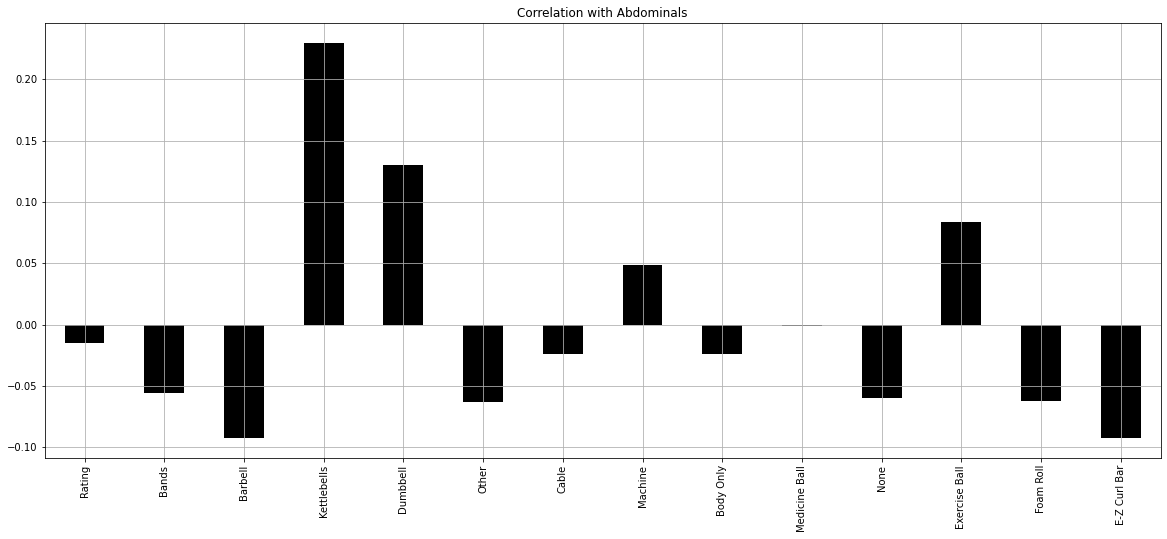

In [ ]:
df_Beg_Abdominals_E.drop('Abdominals', axis=1).corrwith(df_Beg_Abdominals_E.Abdominals).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Abdominals",color="Black")

*Beginner Adductors*

In [ ]:
df_Beg_Adductors

,Title,Type,Equipment,Rating,Adductors
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


In [ ]:
df_Beg_Adductors_E,len_enc_Abd=One_Hot(df_Beg_Adductors,'Equipment',Equipment_cols)
df_Beg_Adductors_E= col_trans(df_Beg_Adductors_E,Equipment_cols,len_enc_Abd)

<Axes: title={'center': 'Correlation with Adductors'}>

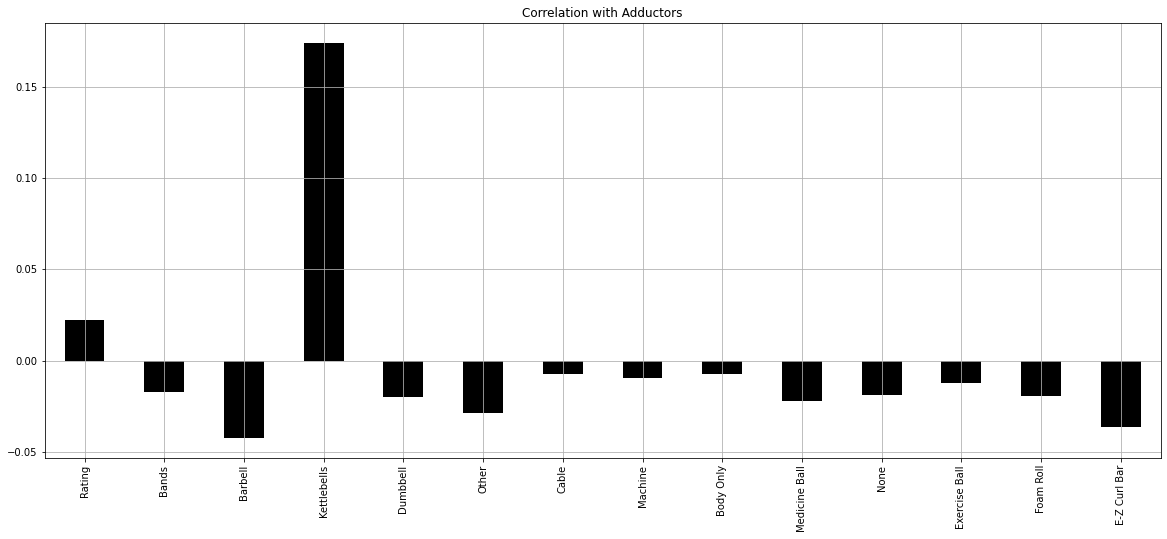

In [ ]:
df_Beg_Adductors_E.drop('Adductors', axis=1).corrwith(df_Beg_Adductors_E['Adductors']).plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with Adductors",color="Black")

*Beginner_Abductors*

In [ ]:
df_Beg_Abductors

,Title,Type,Equipment,Rating,Abductors
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


In [ ]:
def Analysis_Final(df_Beg_col,para,paracols,col_analysis,colors='Black'):  
  df_Beg__E,len_enc_Abd=One_Hot(df_Beg_col,para,paracols)
  df_Beg__E= col_trans(df_Beg__E,paracols,len_enc_Abd)
  df_Beg__E.drop(col_analysis, axis=1).corrwith(df_Beg__E[col_analysis]).plot(kind='bar', grid=True, figsize=(20, 8), title=f"Correlation with {col_analysis}",color=colors)

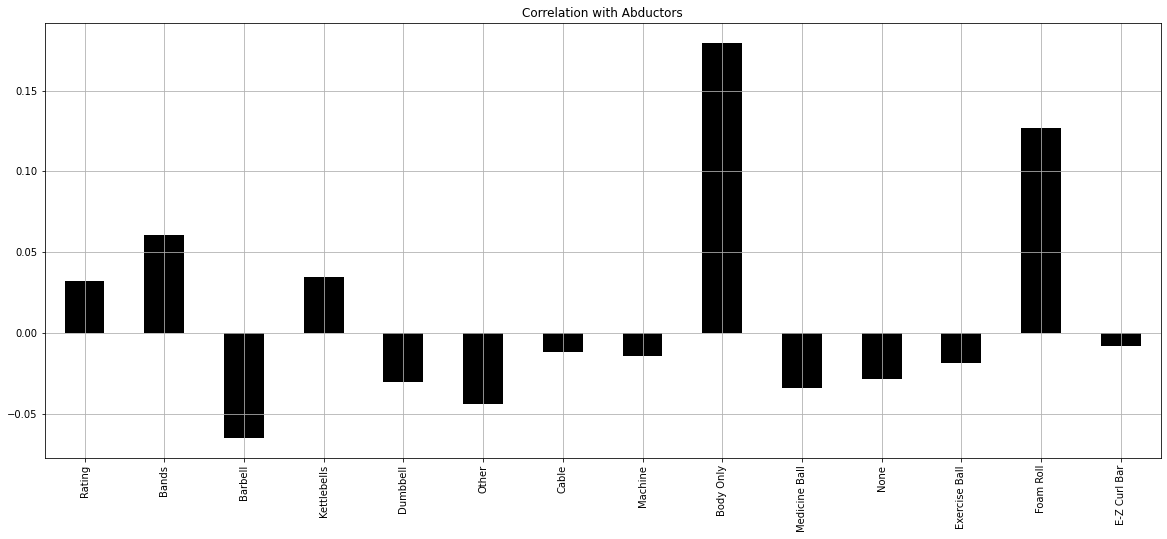

In [ ]:
df_Beg_Abductors_E = Analysis_Final(df_Beg_Abductors,'Equipment',Equipment_cols,'Abductors')

*Begginner_Biceps*

In [ ]:
df_Beg_Biceps

,Title,Type,Equipment,Rating,Biceps
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


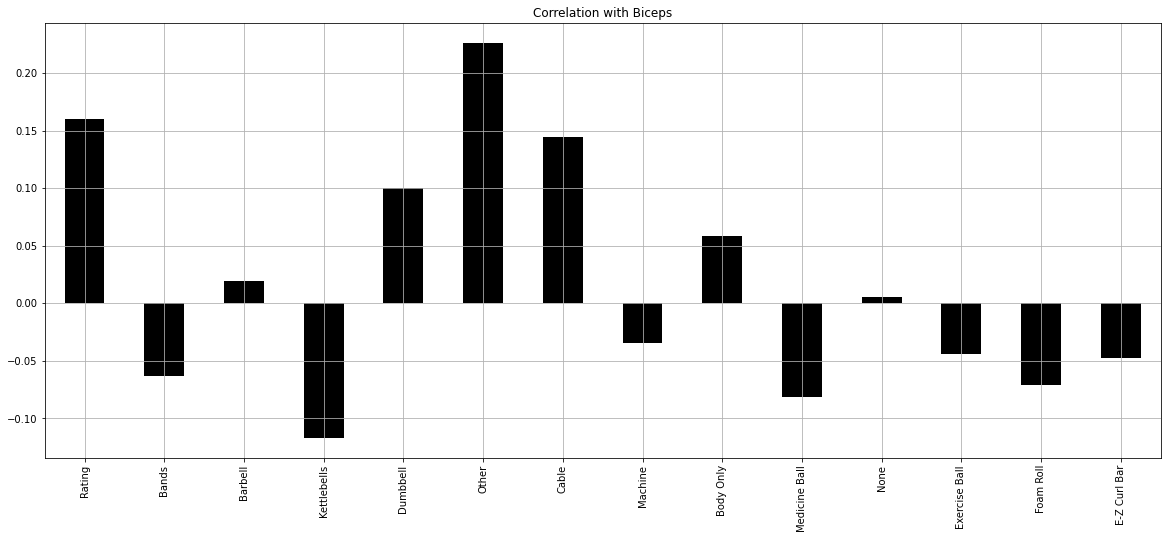

In [ ]:
df_Beg_Biceps_E = Analysis_Final(df_Beg_Biceps,'Equipment',Equipment_cols,'Biceps')

*Begginner_Calves*

In [ ]:
df_Beg_Calves

,Title,Type,Equipment,Rating,Calves
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


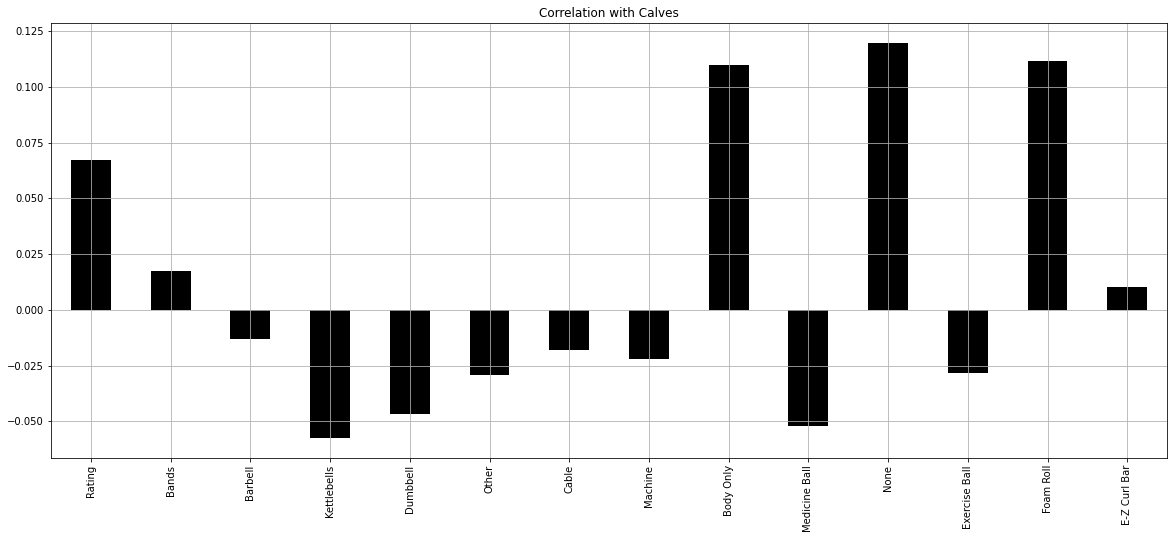

In [ ]:
Analysis_Final(df_Beg_Calves,'Equipment',Equipment_cols,'Calves')

*Begginner_Chest*

In [ ]:
df_Beg_Chest

,Title,Type,Equipment,Rating,Chest
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


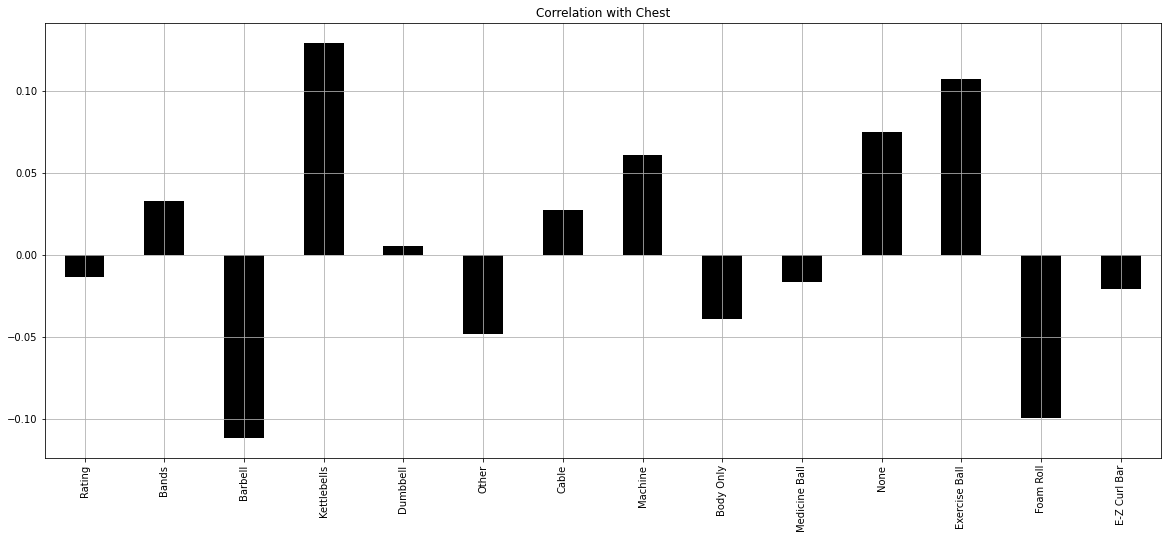

In [ ]:
Analysis_Final(df_Beg_Chest,'Equipment',Equipment_cols,'Chest')

*Begginner_Forearms*

In [ ]:
df_Beg_Forearms

,Title,Type,Equipment,Rating,Forearms
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


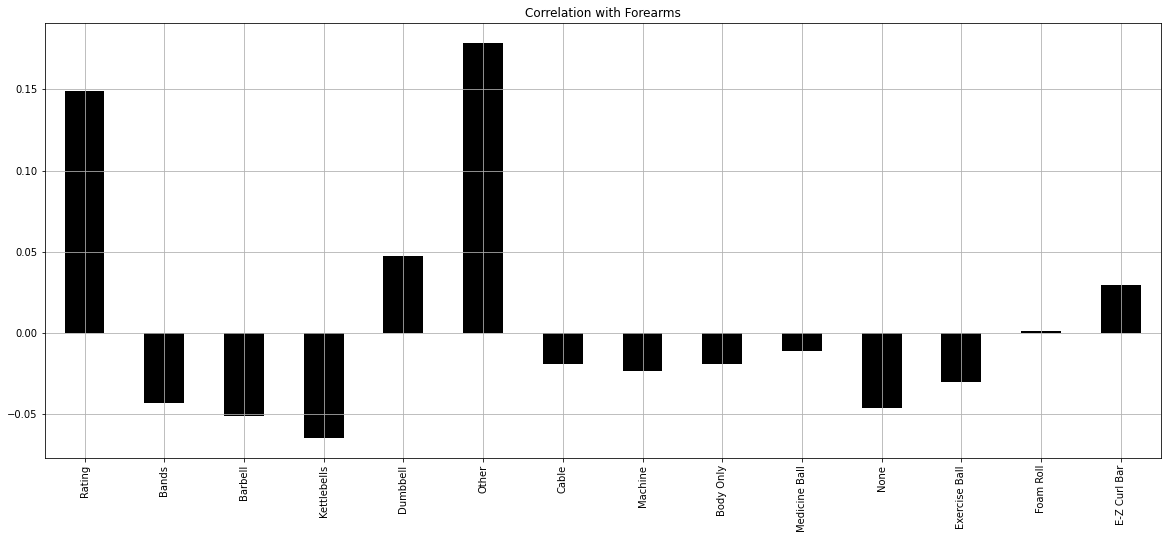

In [ ]:
Analysis_Final(df_Beg_Forearms,'Equipment',Equipment_cols,'Forearms')

*Begginner_Glutes*

In [ ]:
df_Beg_Glutes

,Title,Type,Equipment,Rating,Glutes
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


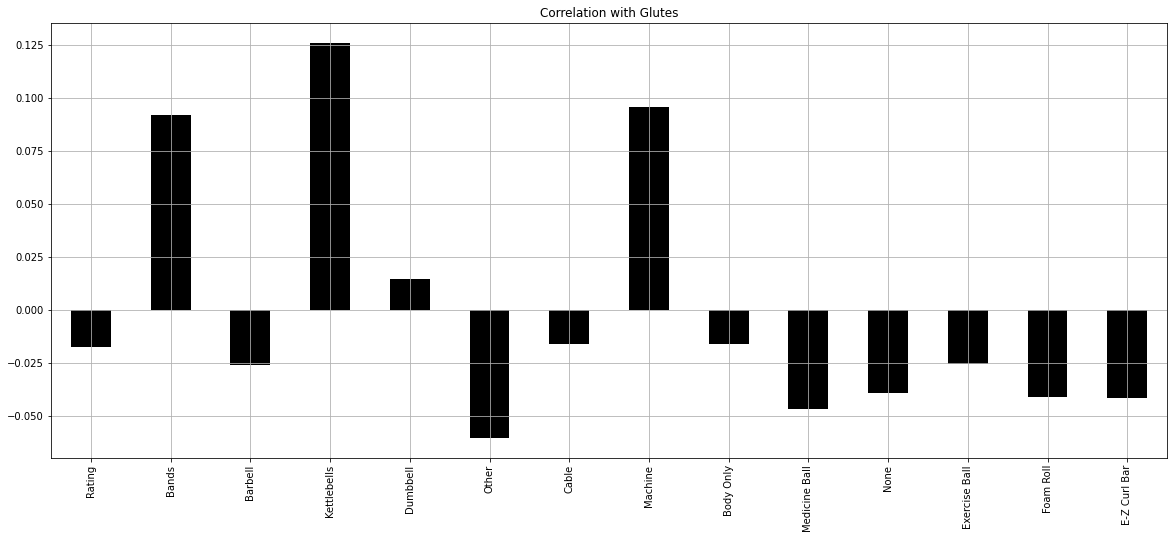

In [ ]:
Analysis_Final(df_Beg_Glutes,'Equipment',Equipment_cols,'Glutes')

*Begginner_Hamstrings*

In [ ]:
df_Beg_Hamstrings

,Title,Type,Equipment,Rating,Hamstrings
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


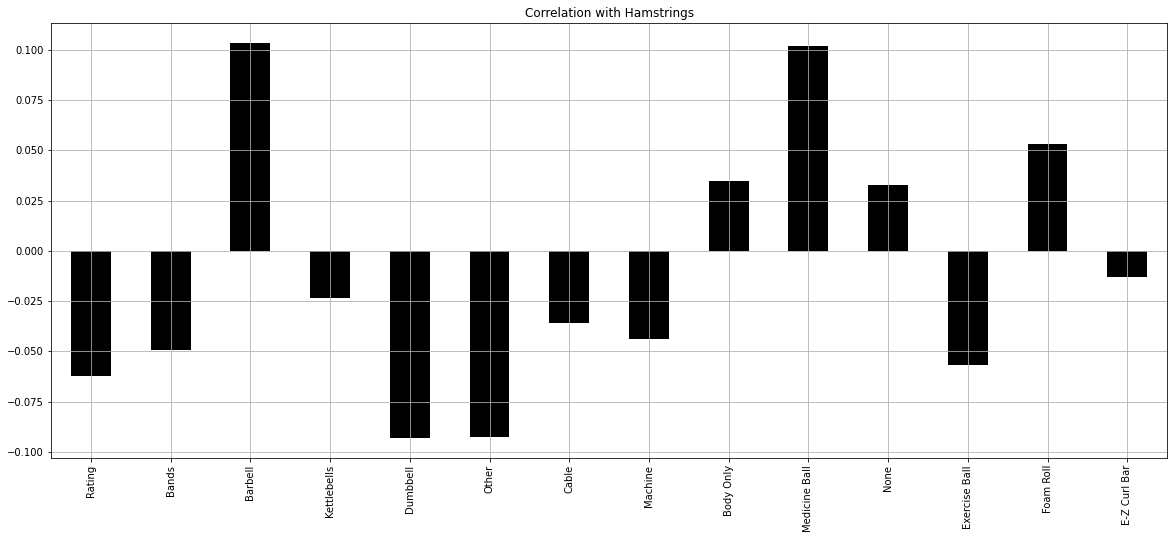

In [ ]:
Analysis_Final(df_Beg_Hamstrings,'Equipment',Equipment_cols,'Hamstrings')

*Begginner_Lats*

In [ ]:
df_Beg_Lats

,Title,Type,Equipment,Rating,Lats
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


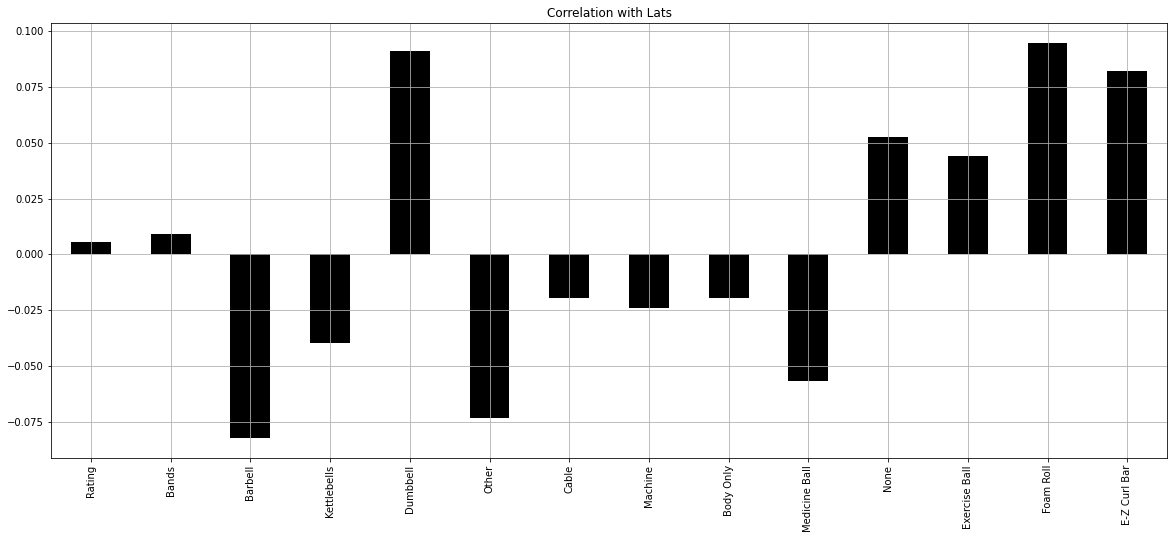

In [ ]:
Analysis_Final(df_Beg_Lats,'Equipment',Equipment_cols,'Lats')

*Beginner_Lower-Back*

In [ ]:
df_Beg_Lower_Back

,Title,Type,Equipment,Rating,Lower Back
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


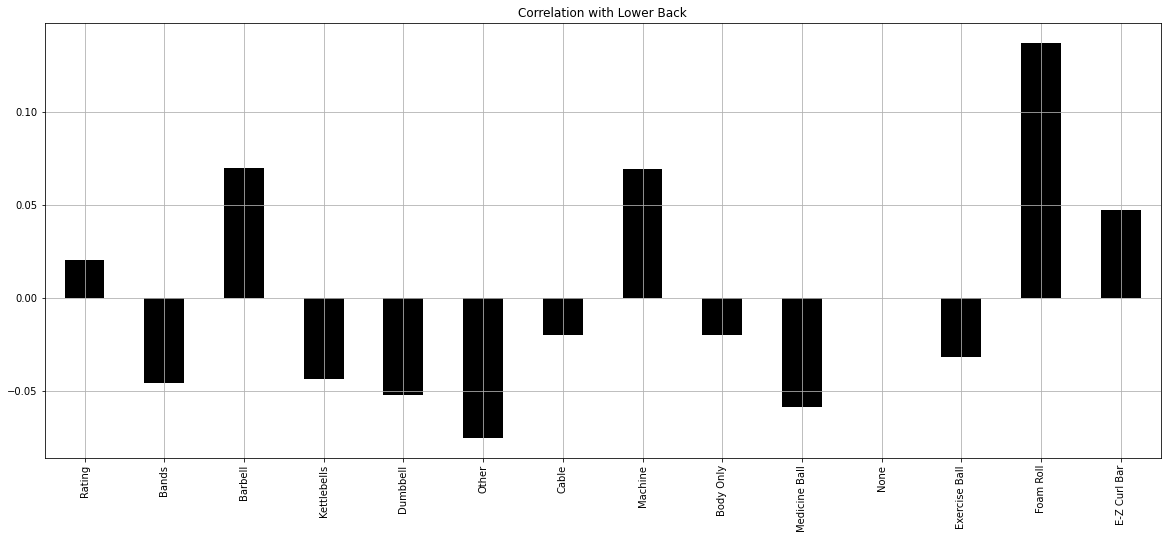

In [ ]:
Analysis_Final(df_Beg_Lower_Back,'Equipment',Equipment_cols,'Lower Back')

*Beginner_Middle-Back*

In [ ]:
df_Beg_Middle_Back

,Title,Type,Equipment,Rating,Middle Back
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


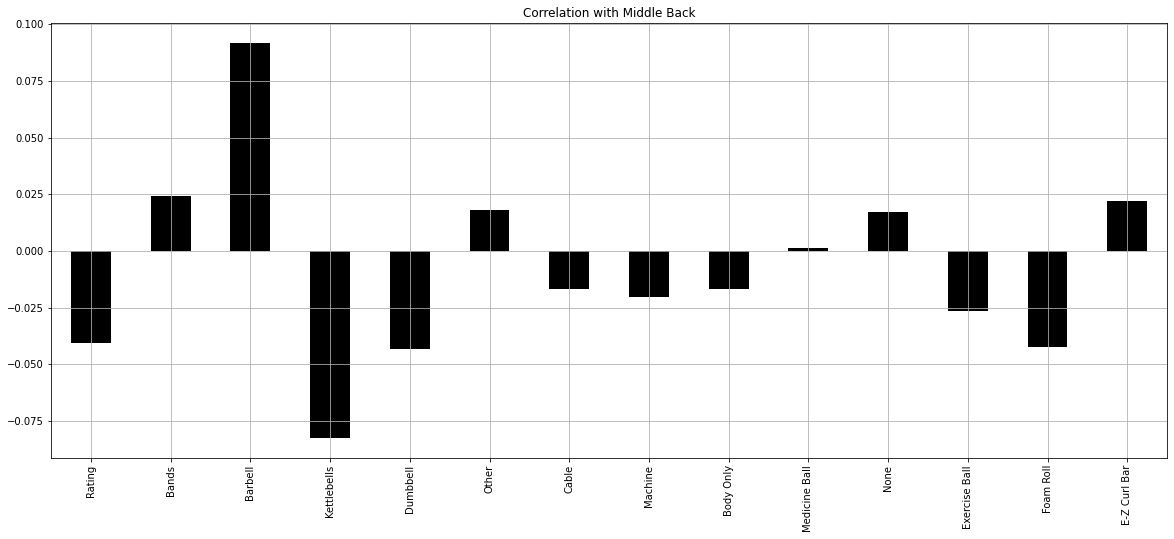

In [ ]:
Analysis_Final(df_Beg_Middle_Back,'Equipment',Equipment_cols,'Middle Back')

*Beginner_Traps*

In [ ]:
df_Beg_Traps

,Title,Type,Equipment,Rating,Traps
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


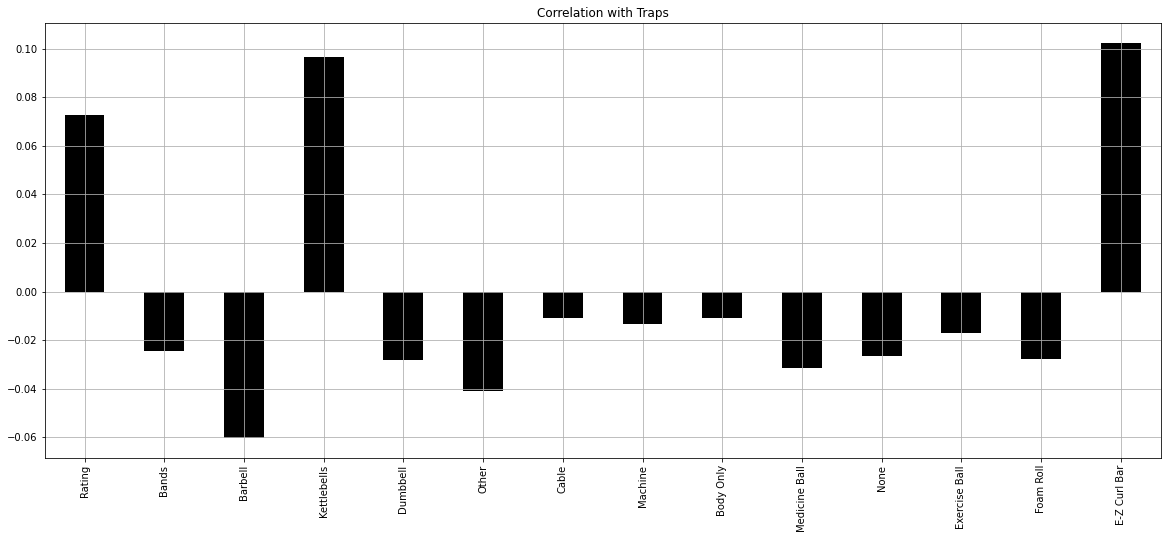

In [ ]:
Analysis_Final(df_Beg_Traps,'Equipment',Equipment_cols,'Traps')

*Beginner_Neck*

In [ ]:
df_Beg_Neck

,Title,Type,Equipment,Rating,Neck
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


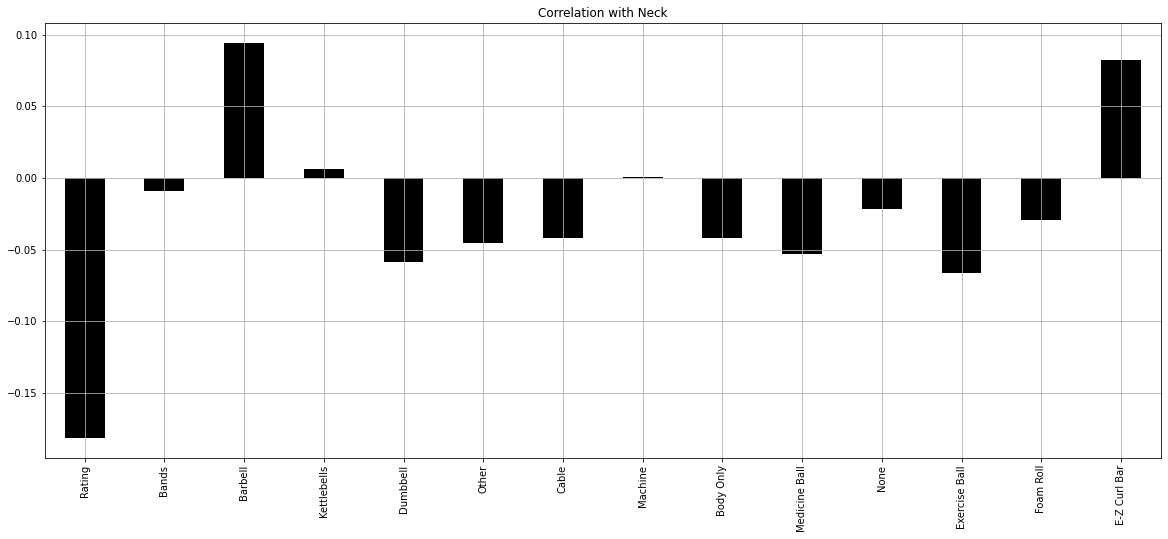

In [ ]:
Analysis_Final(df_Beg_Neck,'Equipment',Equipment_cols,'Neck')

*Beginner_Quadriceps*

In [ ]:
df_Beg_Quadriceps

,Title,Type,Equipment,Rating,Quadriceps
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


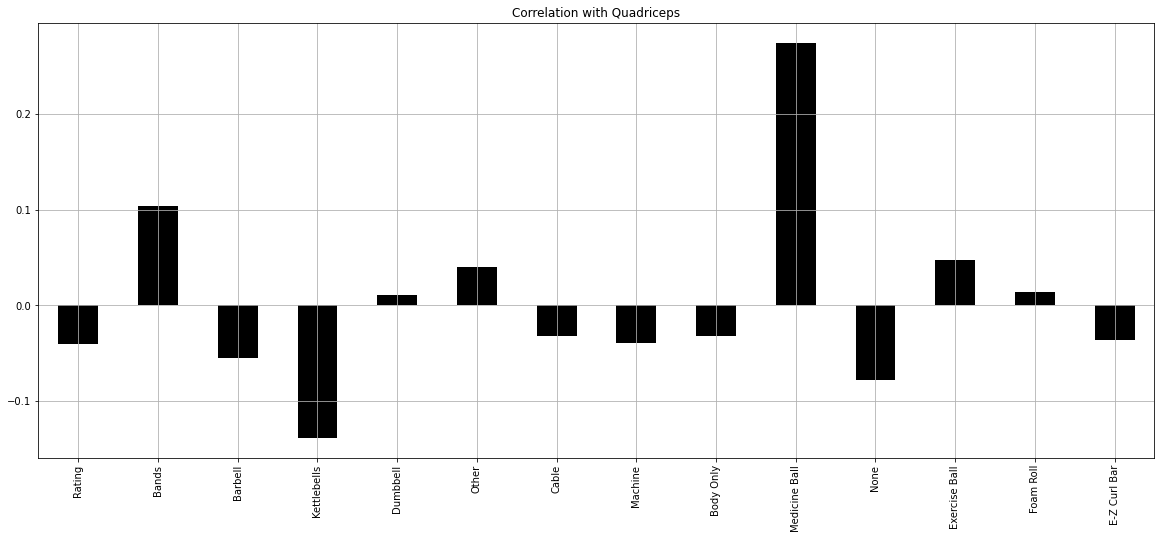

In [ ]:
Analysis_Final(df_Beg_Quadriceps,'Equipment',Equipment_cols,'Quadriceps')

*Beginner_Shoulders*

In [ ]:
df_Beg_Shoulders

,Title,Type,Equipment,Rating,Shoulders
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,0.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,0.0
456,Overhead Triceps,Stretching,Body Only,3.3,0.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,0.0


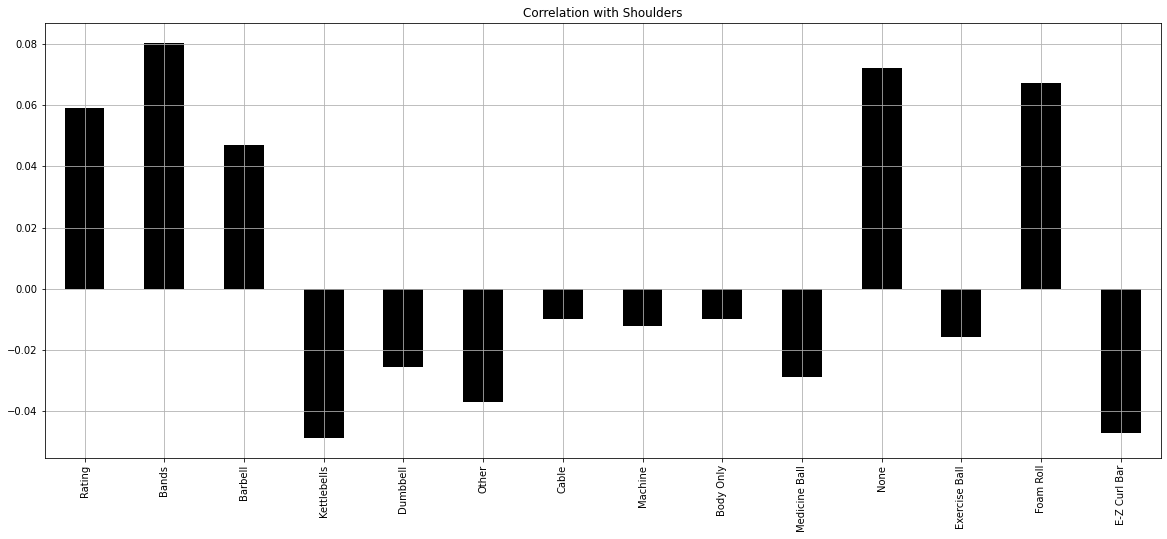

In [ ]:
Analysis_Final(df_Beg_Shoulders,'Equipment',Equipment_cols,'Shoulders')

*Beginner_Triceps*

In [ ]:
df_Beg_Triceps

,Title,Type,Equipment,Rating,Triceps
0,Bench barbell roll-out,Strength,Barbell,8.3,0.0
1,Barbell Side Bend,Strength,Barbell,7.0,0.0
2,Advanced Kettlebell Windmill,Strength,Kettlebells,8.3,0.0
3,Kettlebell Pass Between The Legs,Strength,Kettlebells,7.3,0.0
4,Dumbbell spell caster,Strength,Dumbbell,9.3,0.0
...,...,...,...,...,...
454,Low Cable Triceps Extension,Strength,Cable,8.2,1.0
455,Standing Towel Triceps Extension,Strength,Body Only,6.5,1.0
456,Overhead Triceps,Stretching,Body Only,3.3,1.0
457,Supine Chest Throw,Plyometrics,Medicine Ball,8.2,1.0


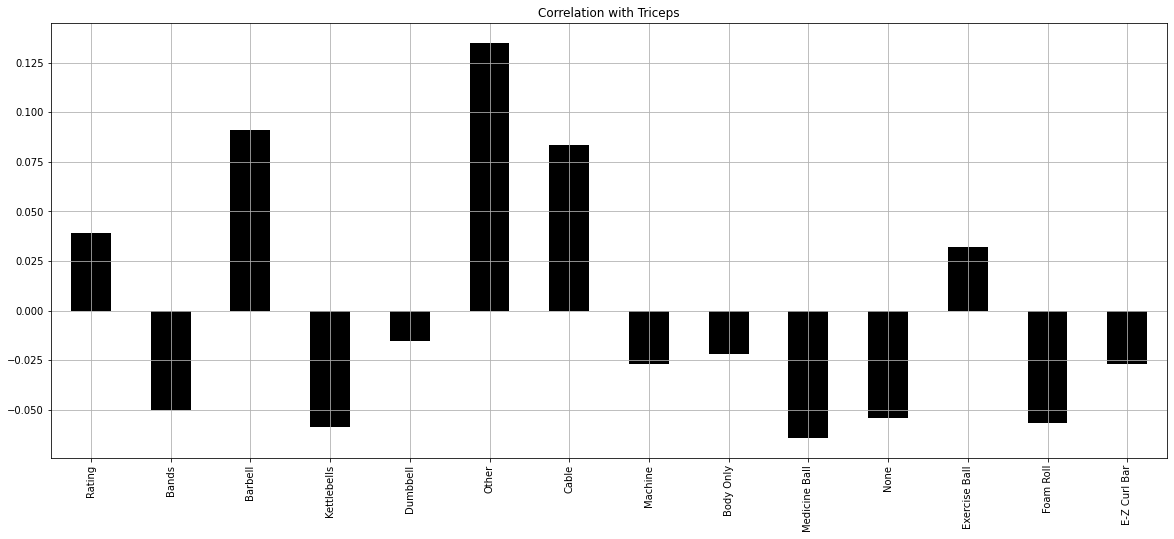

In [ ]:
Analysis_Final(df_Beg_Triceps,'Equipment',Equipment_cols,'Triceps')

**Analysis Type**

<Axes: >

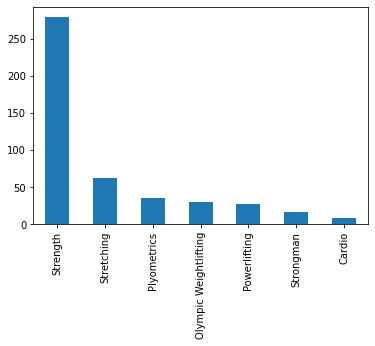

In [ ]:
Beginner_df['Type'].value_counts().plot(kind='bar')

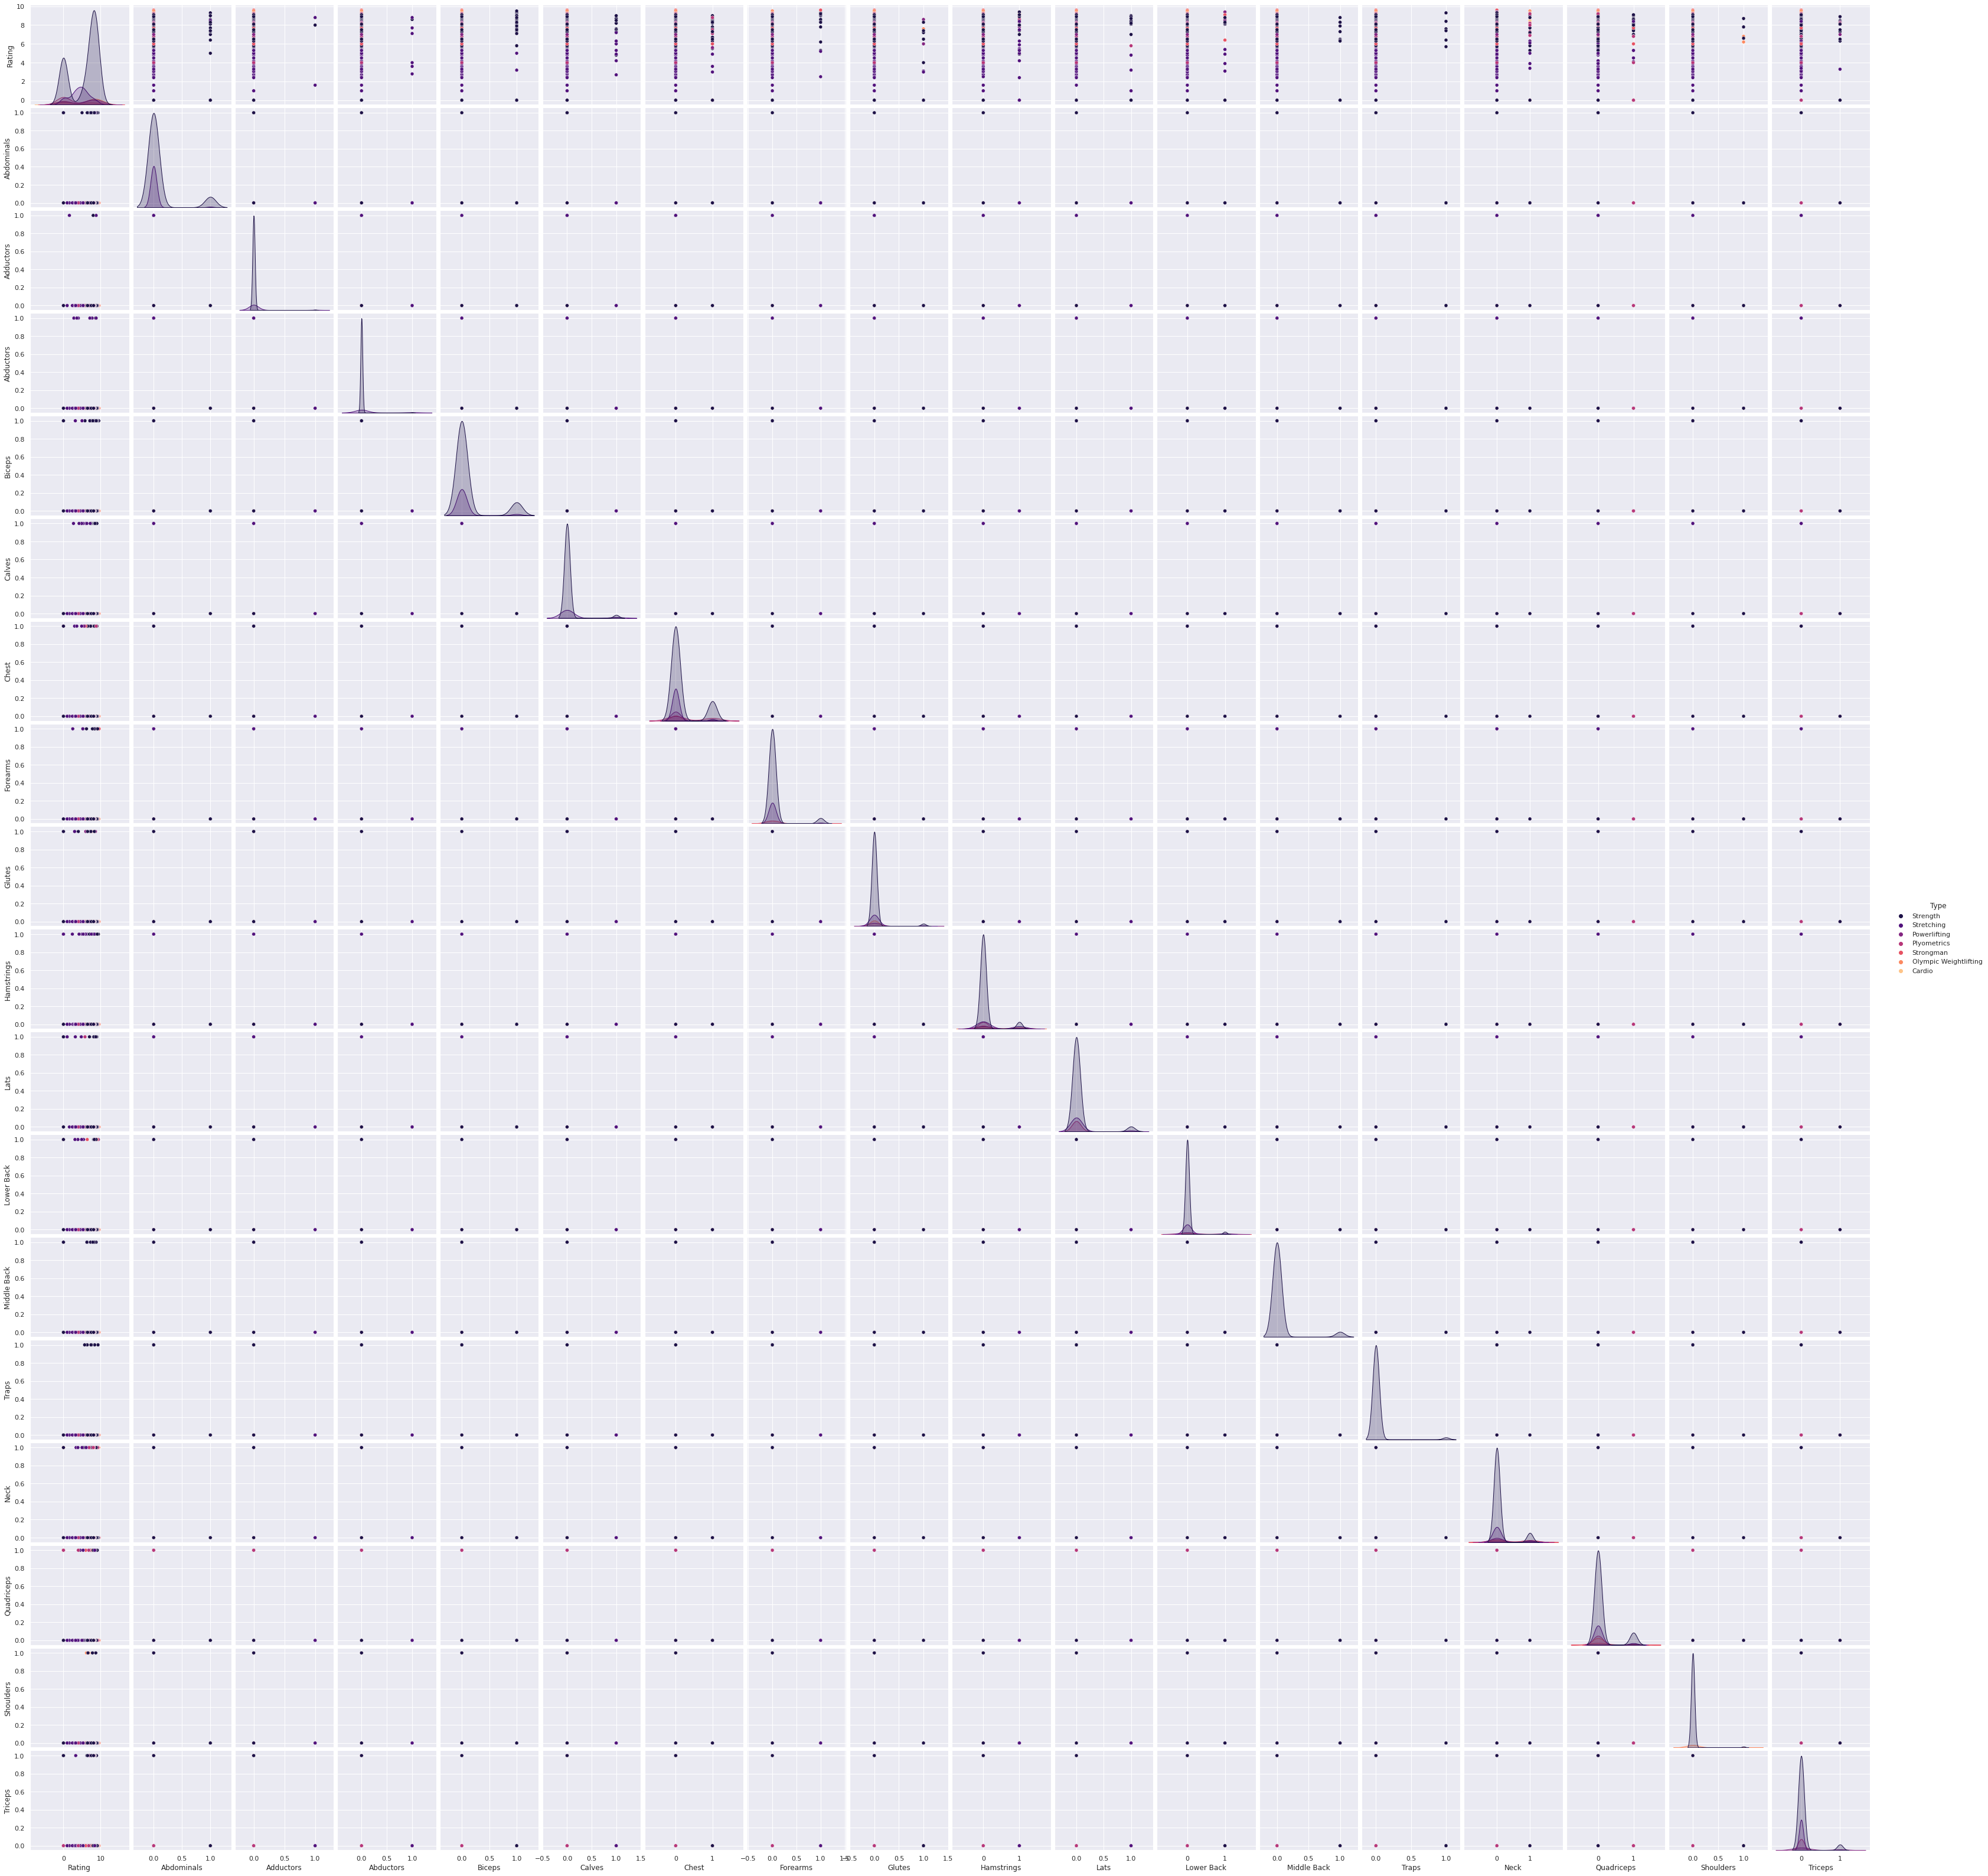

In [ ]:
sns.set_style("darkgrid")
sns.set('notebook')
sns.pairplot(Beginner_df_Bp, hue="Type", palette='magma')
plt.show()

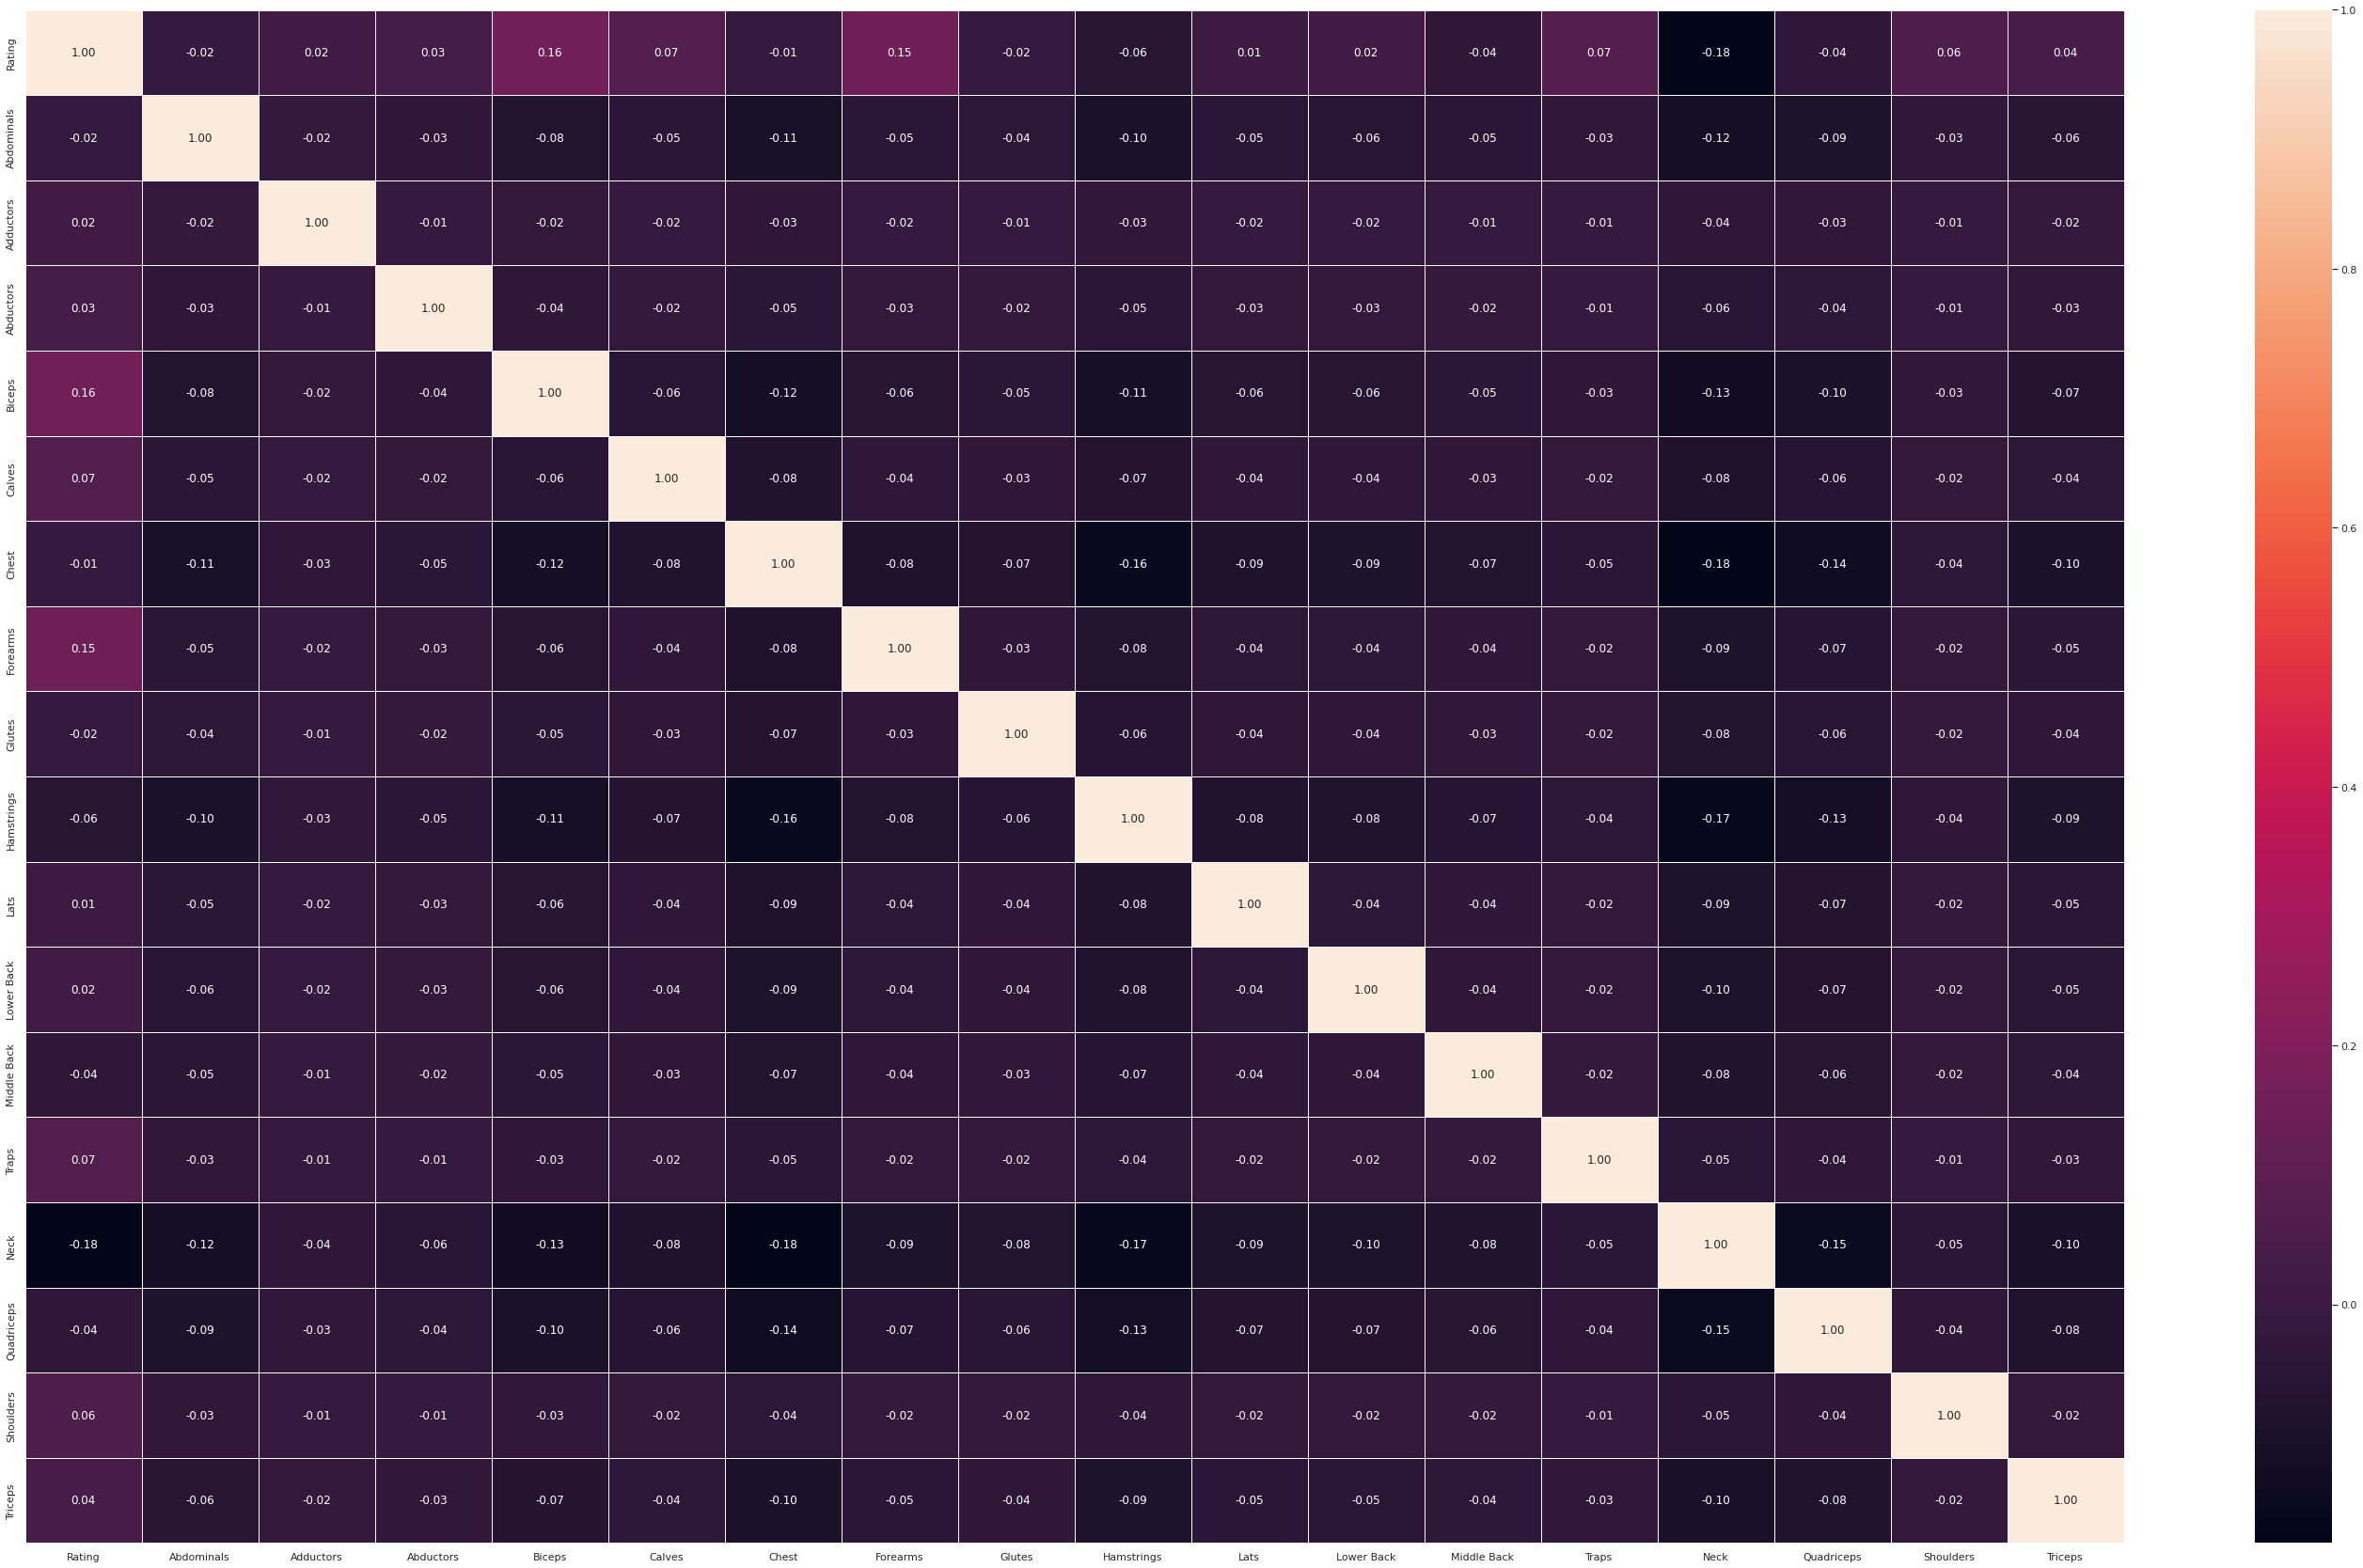

In [ ]:
corr_matrix = Beginner_df_Bp.corr()
fig , ax = plt.subplots(figsize=(50,30))
ax = sns.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f')

# **Intermediate**

In [ ]:
Intermediate_df = Intermediate_df.reset_index(drop=True)

In [ ]:
Intermediate_df.tail()

,Title,Type,BodyPart,Equipment,Level,Rating
2441,EZ-Bar Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,9.0
2442,EZ-bar skullcrusher-,Strength,Triceps,E-Z Curl Bar,Intermediate,8.1
2443,EZ-Bar Skullcrusher - Gethin Variation,Strength,Triceps,E-Z Curl Bar,Intermediate,7.9
2444,TBS Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,7.9
2445,30 Arms EZ-Bar Skullcrusher,Strength,Triceps,E-Z Curl Bar,Intermediate,7.9


In [ ]:
for i in Intermediate_df.columns:
  print(i,':-')
  print('\n')
  print(Intermediate_df[f'{i}'].value_counts())
  print('\n')
  print("**********************************************************************")
  print('\n')

Title :-


Band-suspended kettlebell bench press    3
Seated Cable Rows                        3
Decline bar press sit-up                 2
Arnold press                             2
Seated rear delt fly                     2
                                        ..
Standing Gastrocnemius Calf Stretch      1
Wall calf stretch                        1
Seated Calf Stretch                      1
Standing Calf Raise                      1
30 Arms EZ-Bar Skullcrusher              1
Name: Title, Length: 2437, dtype: int64


**********************************************************************


Type :-


Strength                 2256
Stretching                 84
Plyometrics                60
Cardio                     26
Powerlifting               10
Strongman                   6
Olympic Weightlifting       4
Name: Type, dtype: int64


**********************************************************************


BodyPart :-


Abdominals     632
Quadriceps     560
Shoulders      293
Chest     

In [ ]:
type_cols = list(Intermediate_df['Type'].unique())
BodyPart_cols = list(Intermediate_df['BodyPart'].unique())
Equipment_cols = list(Intermediate_df['Equipment'].unique())

In [ ]:
Intermediate_df_Bp,len_enc_Bp=One_Hot(Intermediate_df,'BodyPart',BodyPart_cols)
Intermediate_df_Bp= col_trans(Intermediate_df_Bp,BodyPart_cols,len_enc_Bp)

## *Body Part*

In [ ]:
Intermediate_df_Bp

,Title,Type,Equipment,Level,Rating,Abdominals,Abductors,Adductors,Biceps,Calves,...,Glutes,Hamstrings,Lats,Lower Back,Middle Back,Traps,Neck,Quadriceps,Shoulders,Triceps
0,Partner plank band row,Strength,Bands,Intermediate,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Banded crunch isometric hold,Strength,Bands,Intermediate,7.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,FYR Banded Plank Jack,Strength,Bands,Intermediate,7.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Banded crunch,Strength,Bands,Intermediate,7.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Crunch,Strength,Bands,Intermediate,7.9,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2441,EZ-Bar Skullcrusher,Strength,E-Z Curl Bar,Intermediate,9.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2442,EZ-bar skullcrusher-,Strength,E-Z Curl Bar,Intermediate,8.1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2443,EZ-Bar Skullcrusher - Gethin Variation,Strength,E-Z Curl Bar,Intermediate,7.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2444,TBS Skullcrusher,Strength,E-Z Curl Bar,Intermediate,7.9,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
Inter_Bp_cols = list(Intermediate_df_Bp.columns)
Inter_Bp_cols

['Title',
 'Type',
 'Equipment',
 'Level',
 'Rating',
 'Abdominals',
 'Abductors',
 'Adductors',
 'Biceps',
 'Calves',
 'Chest',
 'Forearms',
 'Glutes',
 'Hamstrings',
 'Lats',
 'Lower Back',
 'Middle Back',
 'Traps',
 'Neck',
 'Quadriceps',
 'Shoulders',
 'Triceps']

In [ ]:
Abdominals = cols_Beg_analysis('Abdominals',Inter_Bp_cols)
Adductors = cols_Beg_analysis('Adductors',Inter_Bp_cols)
Abductors = cols_Beg_analysis('Abductors',Inter_Bp_cols)
Biceps = cols_Beg_analysis('Biceps',Inter_Bp_cols)
Calves = cols_Beg_analysis('Calves',Inter_Bp_cols)
Chest = cols_Beg_analysis('Chest',Inter_Bp_cols)
Forearms = cols_Beg_analysis('Forearms',Inter_Bp_cols)
Glutes = cols_Beg_analysis('Glutes',Inter_Bp_cols)
Hamstrings = cols_Beg_analysis('Hamstrings',Inter_Bp_cols)
Lats = cols_Beg_analysis('Lats',Inter_Bp_cols)
Lower_Back = cols_Beg_analysis('Lower Back',Inter_Bp_cols)
Middle_Back = cols_Beg_analysis('Middle Back',Inter_Bp_cols)
Traps = cols_Beg_analysis('Traps',Inter_Bp_cols)
Neck = cols_Beg_analysis('Neck',Inter_Bp_cols)
Quadriceps = cols_Beg_analysis('Quadriceps',Inter_Bp_cols)
Shoulders = cols_Beg_analysis('Shoulders',Inter_Bp_cols)
Triceps = cols_Beg_analysis('Triceps',Inter_Bp_cols)

###***Intermediate Analysis***

In [ ]:
df_Inter_Abdominals = Intermediate_df_Bp.drop(Abdominals,axis=1)
df_Inter_Adductors = Intermediate_df_Bp.drop(Adductors,axis=1)
df_Inter_Abductors = Intermediate_df_Bp.drop(Abductors,axis=1)
df_Inter_Biceps = Intermediate_df_Bp.drop(Biceps,axis=1)
df_Inter_Calves = Intermediate_df_Bp.drop(Calves,axis=1)
df_Inter_Chest = Intermediate_df_Bp.drop(Chest,axis=1)
df_Inter_Forearms = Intermediate_df_Bp.drop(Forearms,axis=1)
df_Inter_Glutes = Intermediate_df_Bp.drop(Glutes,axis=1)
df_Inter_Hamstrings = Intermediate_df_Bp.drop(Hamstrings,axis=1)
df_Inter_Lats = Intermediate_df_Bp.drop(Lats,axis=1)
df_Inter_Lower_Back = Intermediate_df_Bp.drop(Lower_Back,axis=1)
df_Inter_Middle_Back = Intermediate_df_Bp.drop(Middle_Back,axis=1)
df_Inter_Traps = Intermediate_df_Bp.drop(Traps,axis=1)
df_Inter_Neck = Intermediate_df_Bp.drop(Neck,axis=1)
df_Inter_Quadriceps = Intermediate_df_Bp.drop(Quadriceps,axis=1)
df_Inter_Shoulders = Intermediate_df_Bp.drop(Shoulders,axis=1)
df_Inter_Triceps = Intermediate_df_Bp.drop(Triceps,axis=1)

***Abdominals***

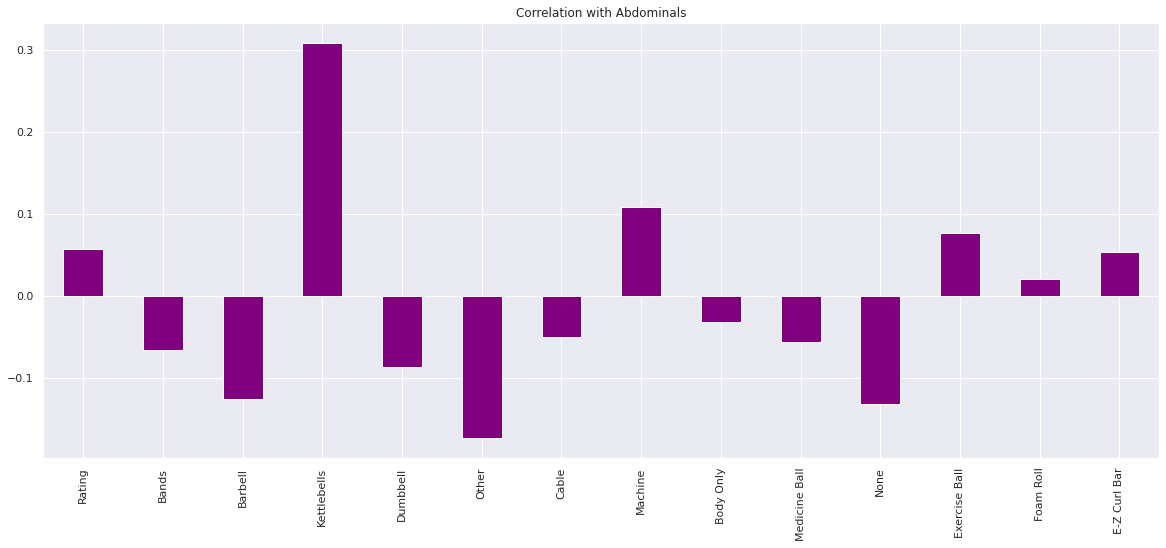

In [ ]:
df_Inter_Abdominals_E = Analysis_Final(df_Inter_Abdominals,'Equipment',Equipment_cols,'Abdominals',colors='Purple')

***Adductors***

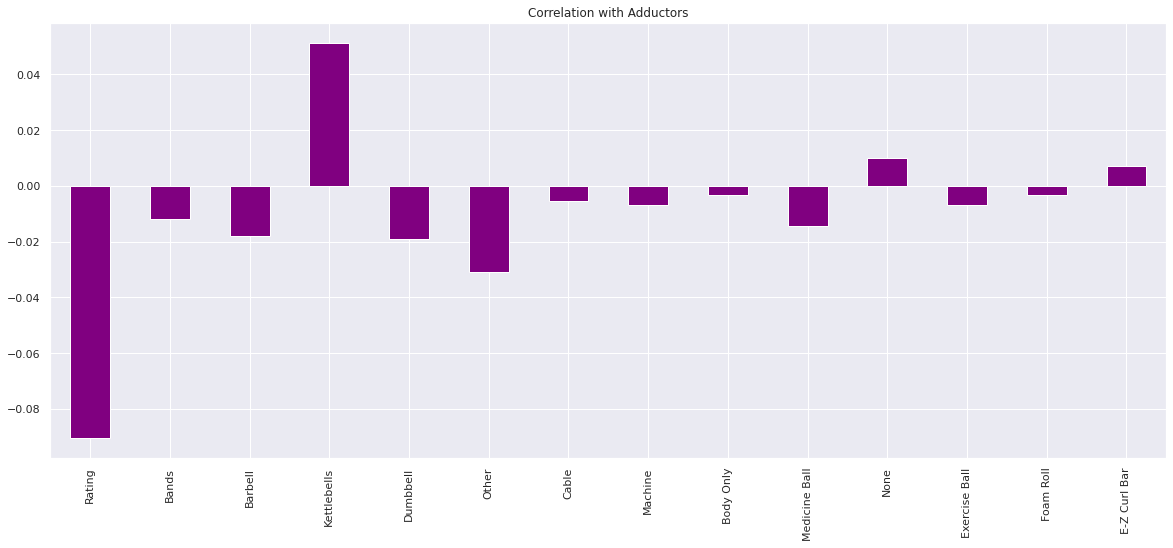

In [ ]:
df_Inter_Adductors_E = Analysis_Final(df_Inter_Adductors,'Equipment',Equipment_cols,'Adductors',colors='Purple')

***Abductors***

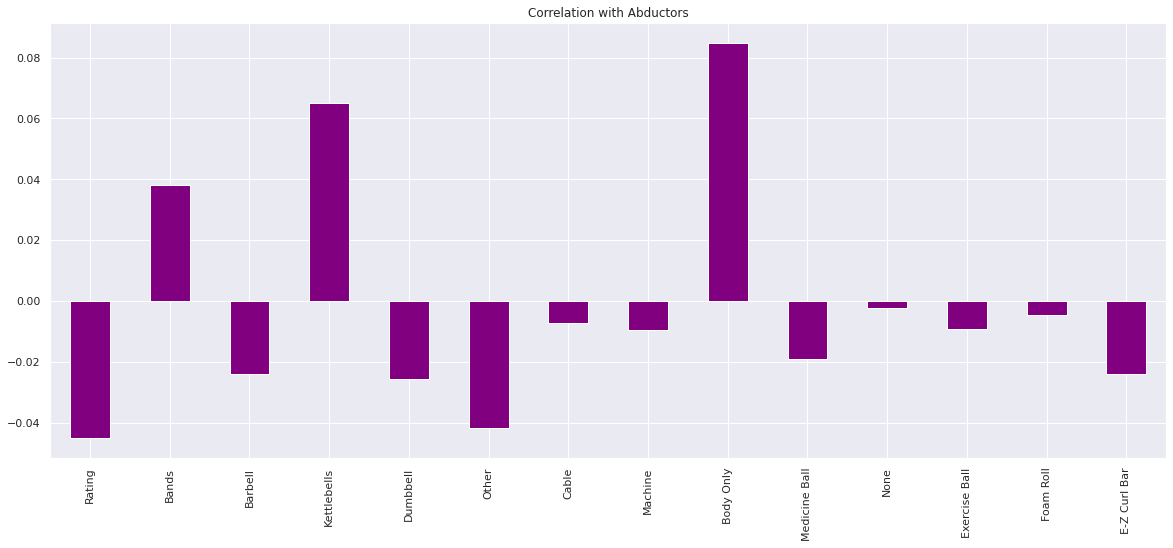

In [ ]:
df_Inter_Abductors_E = Analysis_Final(df_Inter_Abductors,'Equipment',Equipment_cols,'Abductors',colors='Purple')

***Biceps***

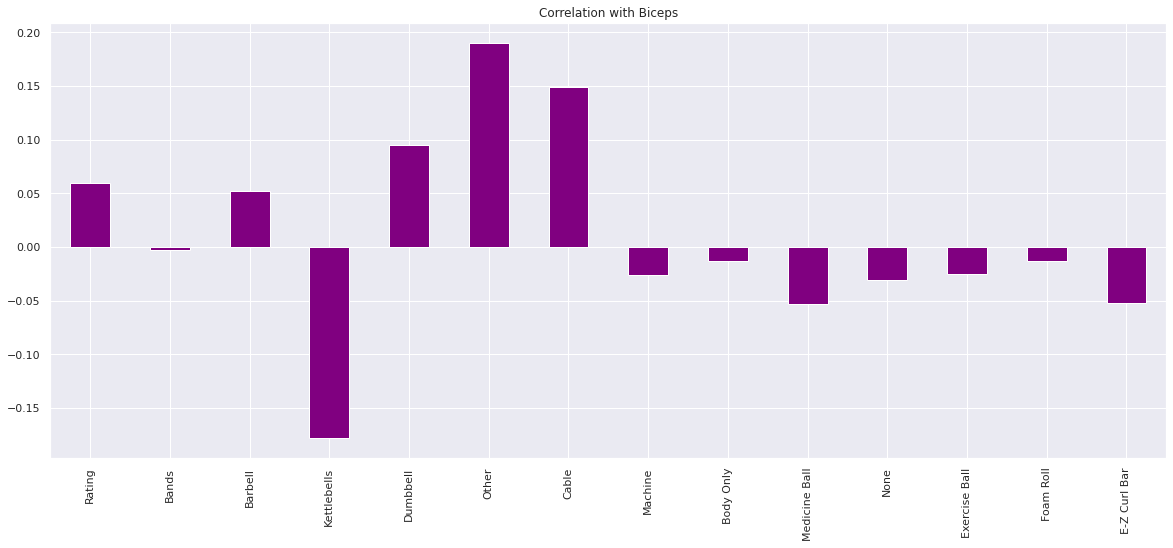

In [ ]:
df_Inter_Biceps_E = Analysis_Final(df_Inter_Biceps,'Equipment',Equipment_cols,'Biceps',colors='Purple')

***Chest***

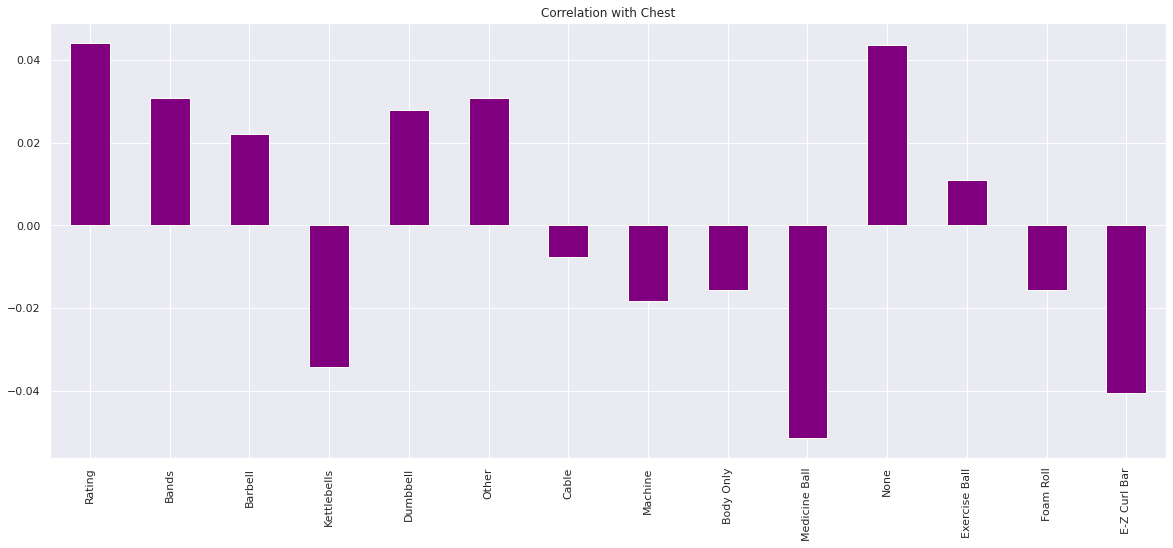

In [ ]:
df_Inter_Chest_E = Analysis_Final(df_Inter_Chest,'Equipment',Equipment_cols,'Chest',colors='Purple')

***Forearms***

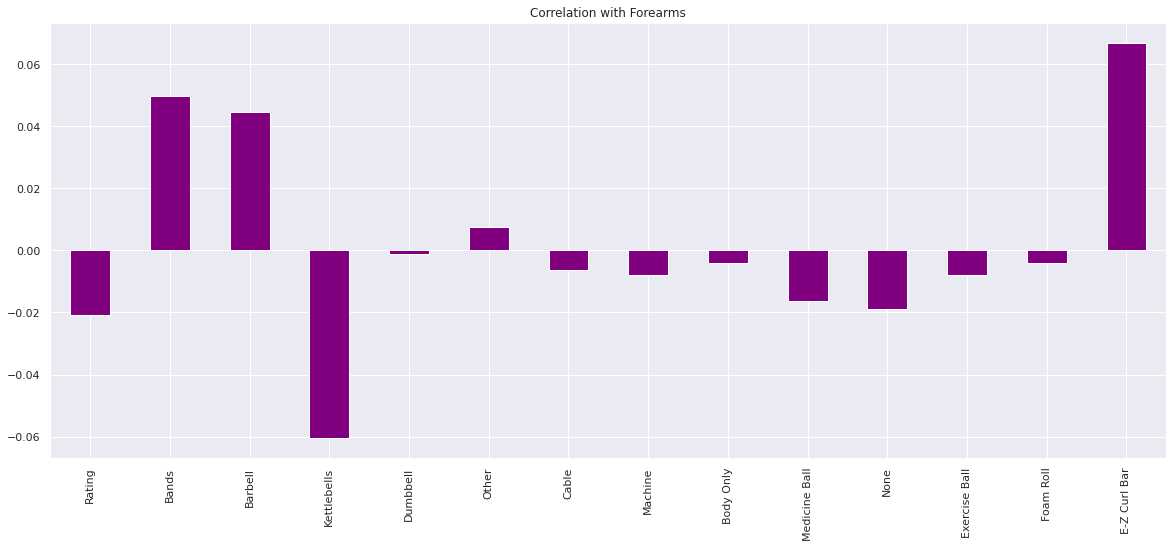

In [ ]:
df_Inter_Forearms_E = Analysis_Final(df_Inter_Forearms,'Equipment',Equipment_cols,'Forearms',colors='Purple')

***Glutes***

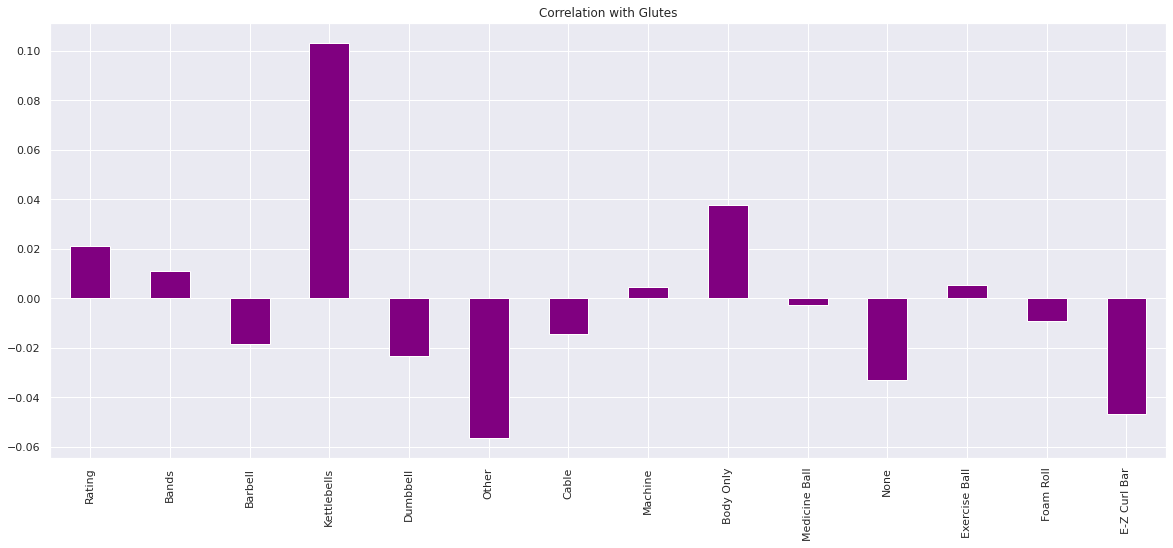

In [ ]:
df_Inter_Glutes_E = Analysis_Final(df_Inter_Glutes,'Equipment',Equipment_cols,'Glutes',colors='Purple')

***Hamstrings***

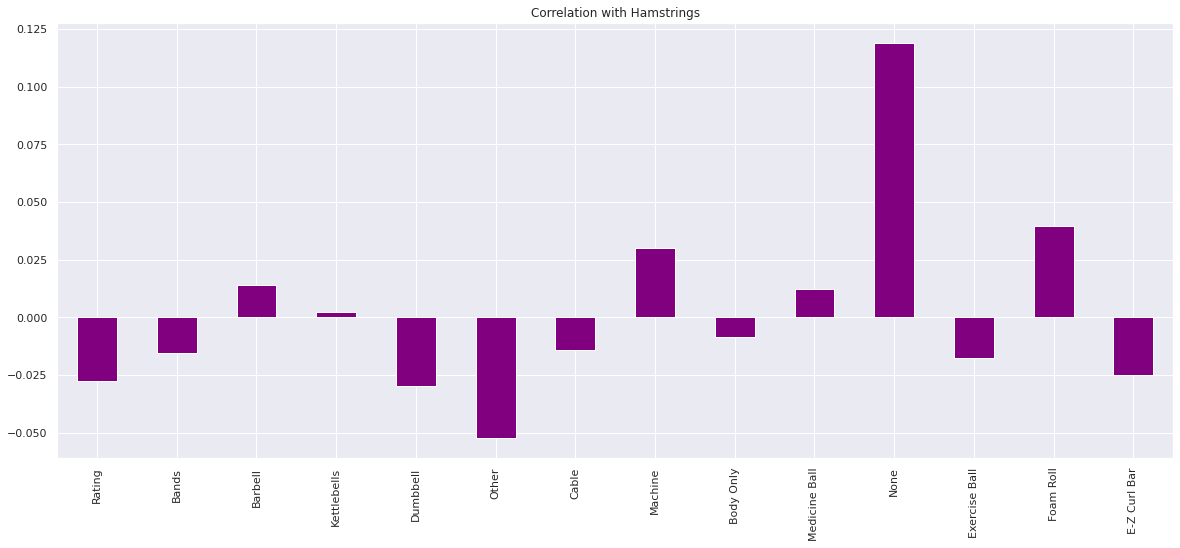

In [ ]:
df_Inter_Hamstrings_E = Analysis_Final(df_Inter_Hamstrings,'Equipment',Equipment_cols,'Hamstrings',colors='Purple')

***Lats***

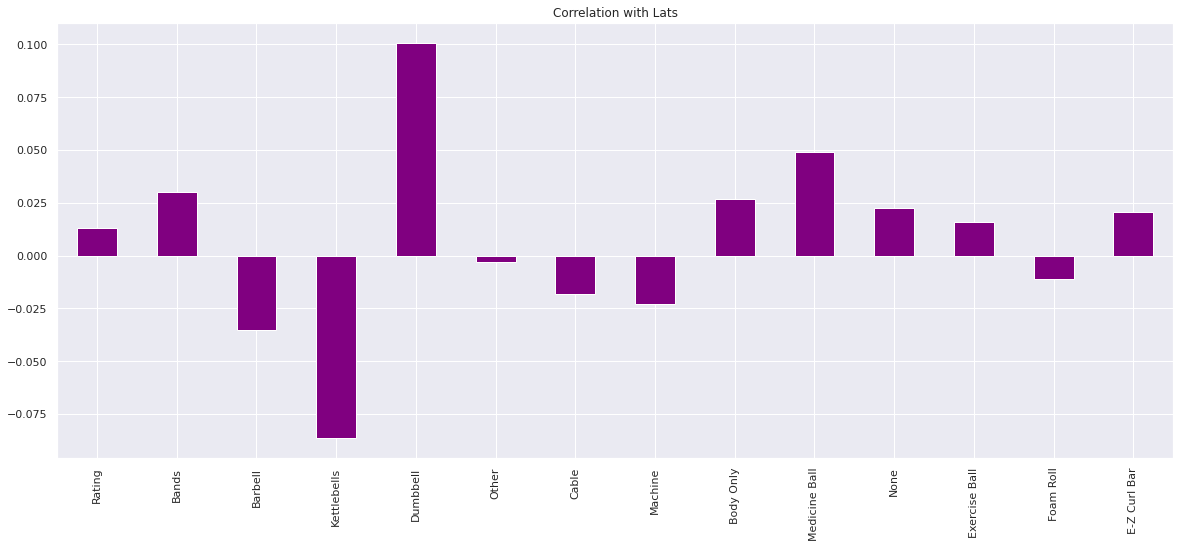

In [ ]:
df_Inter_Lats_E = Analysis_Final(df_Inter_Lats,'Equipment',Equipment_cols,'Lats',colors='Purple')

***Lower Back***

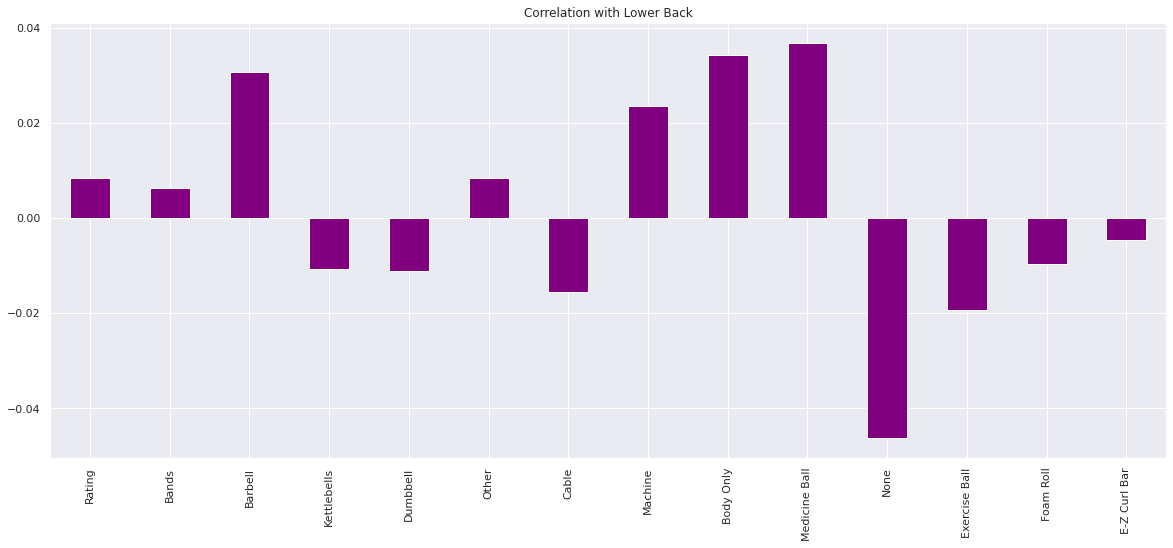

In [ ]:
df_Inter_Lower_Back_E = Analysis_Final(df_Inter_Lower_Back,'Equipment',Equipment_cols,'Lower Back',colors='Purple')

***Middle Back***

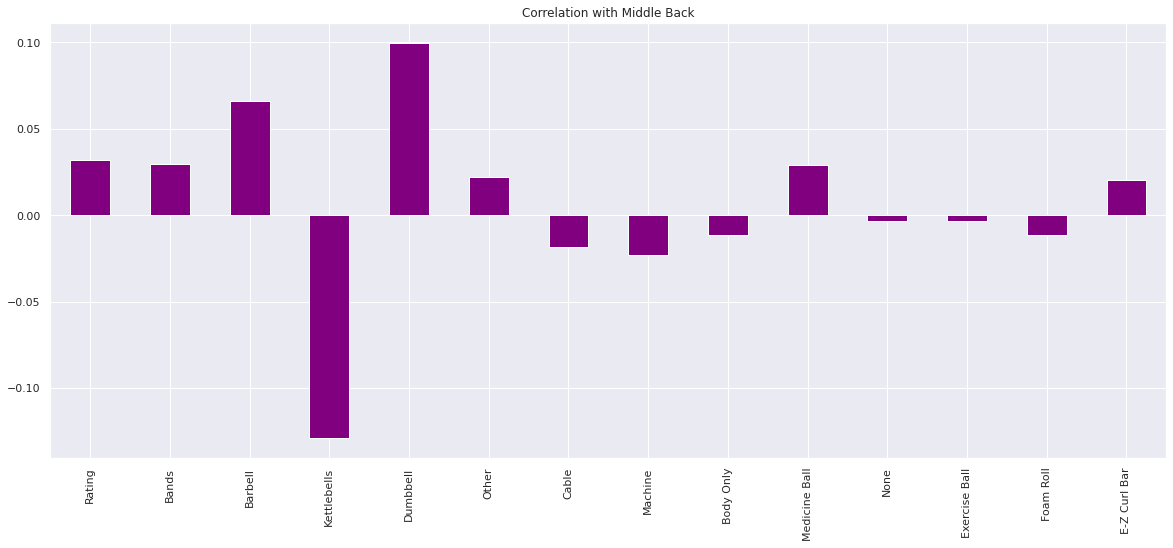

In [ ]:
df_Inter_Middle_Back_E = Analysis_Final(df_Inter_Middle_Back,'Equipment',Equipment_cols,'Middle Back',colors='Purple')

***Traps***

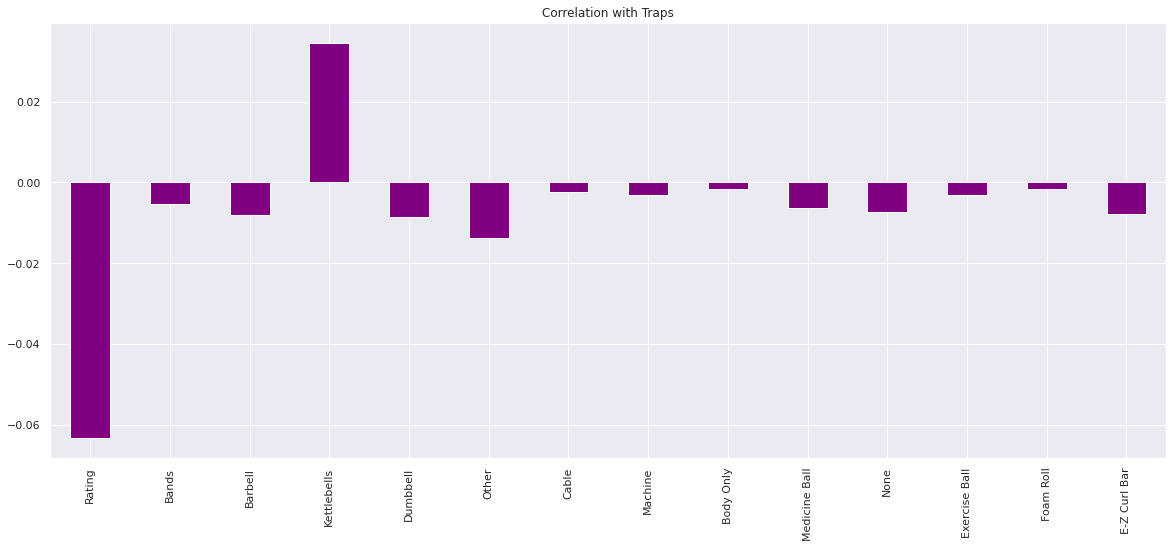

In [ ]:
df_Inter_Traps_E = Analysis_Final(df_Inter_Traps,'Equipment',Equipment_cols,'Traps',colors='Purple')

***Neck***

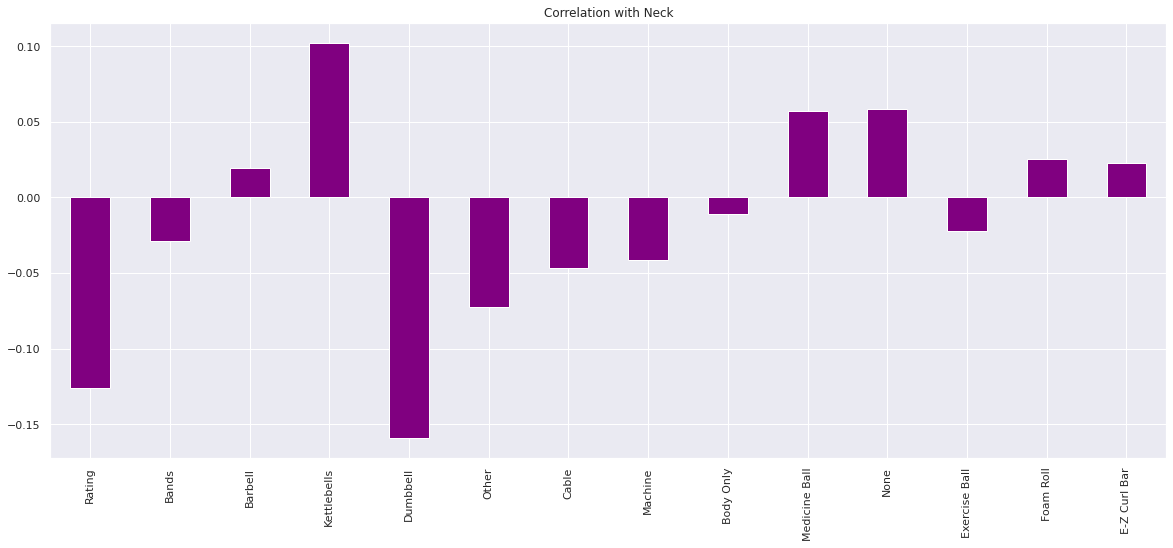

In [ ]:
df_Inter_Neck_E = Analysis_Final(df_Inter_Neck,'Equipment',Equipment_cols,'Neck',colors='Purple')

***Quadriceps***

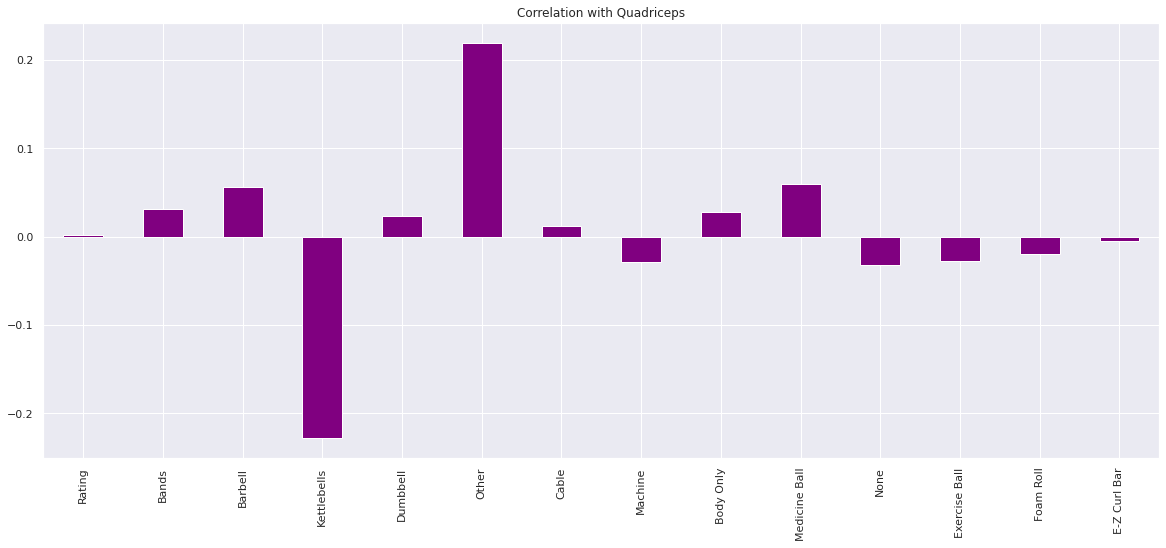

In [ ]:
df_Inter_Lower_Quadriceps_E = Analysis_Final(df_Inter_Quadriceps,'Equipment',Equipment_cols,'Quadriceps',colors='Purple')

***Shoulders***

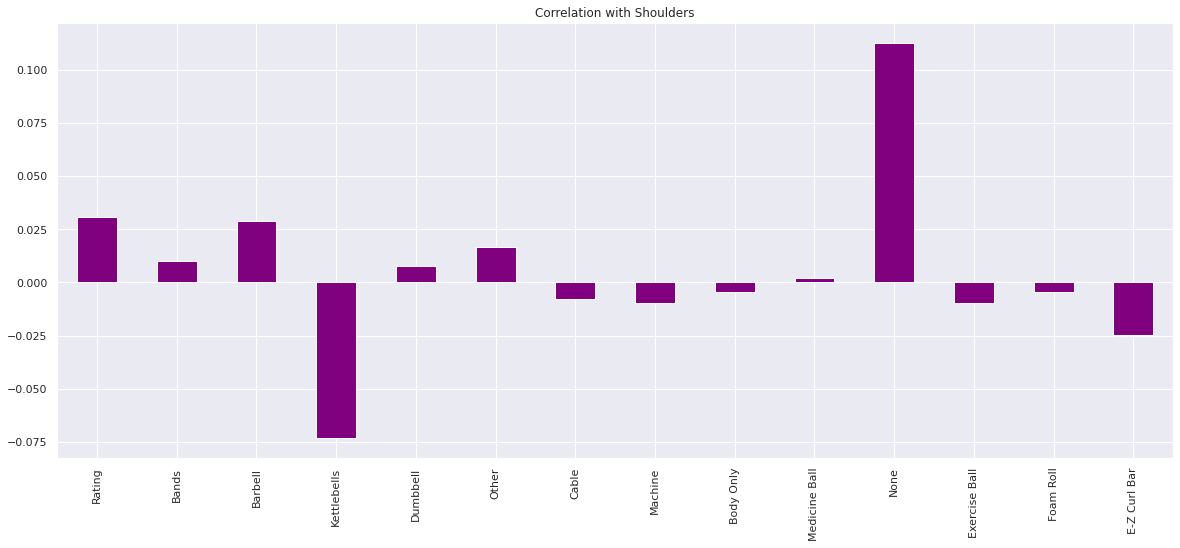

In [ ]:
df_Inter_Shoulders_E = Analysis_Final(df_Inter_Shoulders,'Equipment',Equipment_cols,'Shoulders',colors='Purple')

***Triceps***

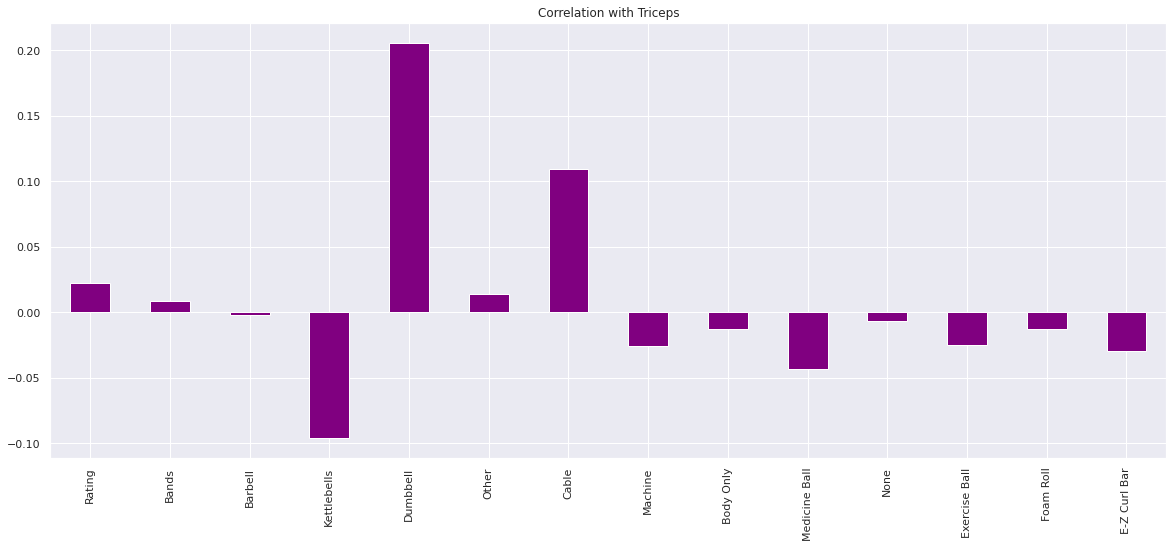

In [ ]:
df_Inter_Triceps_E = Analysis_Final(df_Inter_Triceps,'Equipment',Equipment_cols,'Triceps',colors='Purple')

In [ ]:
Intermediate_df['Type'].value_counts().plot(kind='bar')